## Linear regression 1D: Training Two Parameter Stochastic Gradient Descent (SGD)

In [84]:
# These are the libraries we are going to use in the lab.
import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

In [85]:
# The class for plot the diagram
class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [86]:
# Set random seed
torch.manual_seed(1)

In [87]:
# Setup the actual data and simulated data
X = torch.arange(-3.0, 3.0, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

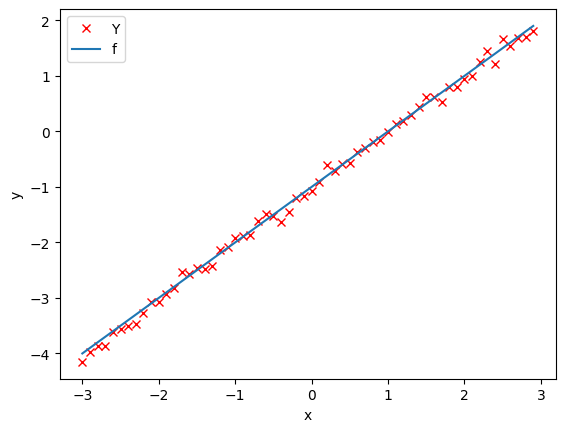

In [88]:
# Plot out the data dots and line
plt.plot(X.numpy(), Y.numpy(), 'rx', label='Y')
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [89]:
# Define the forward function
def forward(x):
  return w*x+b

In [90]:
# Define the MSE Loss function
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

<Figure size 640x480 with 0 Axes>

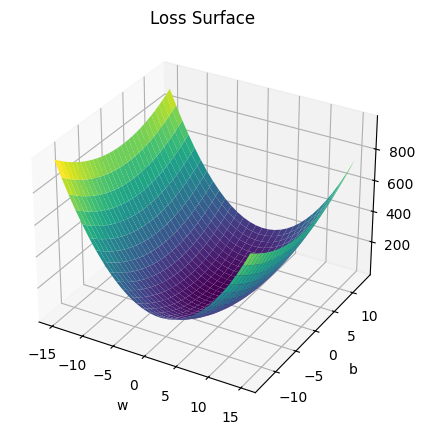

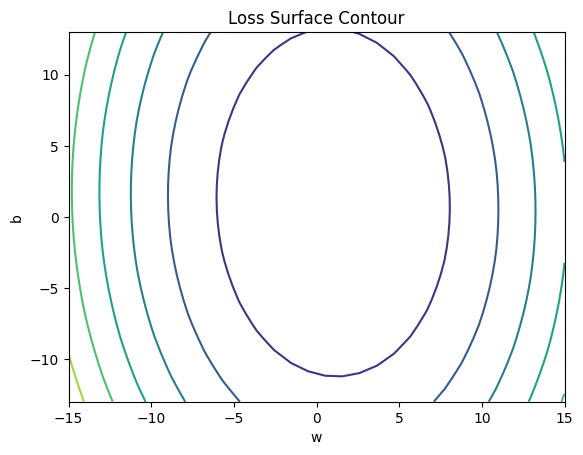

In [91]:
# Create plot_error_surfaces for viewing the data
get_surface = plot_error_surfaces(15,13,X,Y,30)

In [92]:
# Define the parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

In [93]:
# Define learning rate and create an empty list for containing the loss for each iteration.
lr=0.1
LOSS_BGD = []

In [94]:
# The function for training the model
def train_model(iter):
  # Loop
  for epoch in range(iter):
    # make a prediction
    yhat = forward(X)
    # calculate the loss
    loss = criterion(yhat, Y)
    # Section for plotting
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.data.tolist())
    get_surface.plot_ps()
    # store the loss in the list LOSS_BGD
    LOSS_BGD.append(loss)
    # backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()
    # update parameters slope and bias
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    # zero the gradients before running the backward pass
    w.grad.zero_()
    b.grad.zero_()


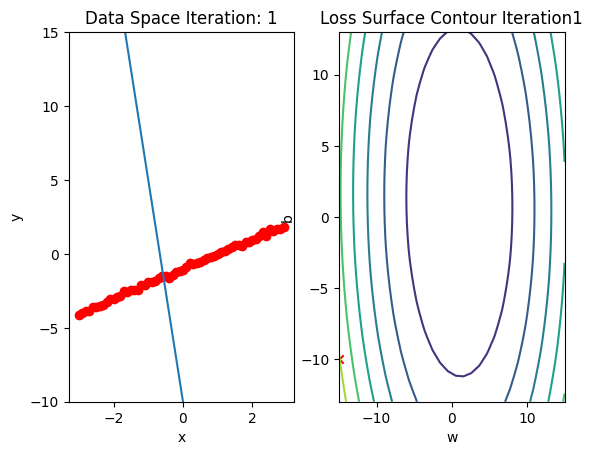

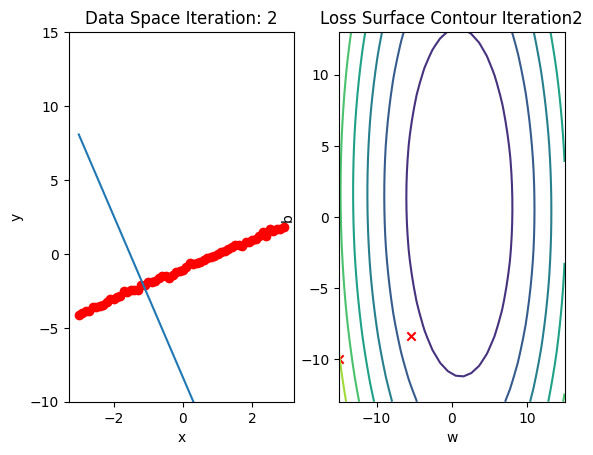

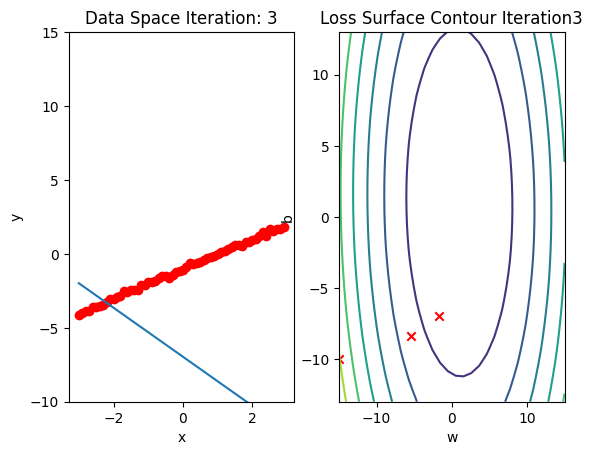

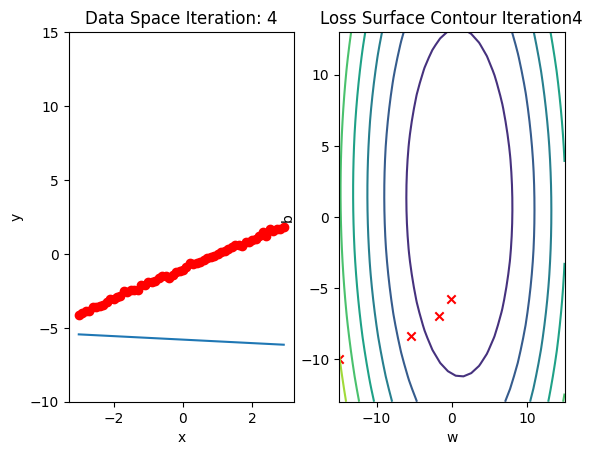

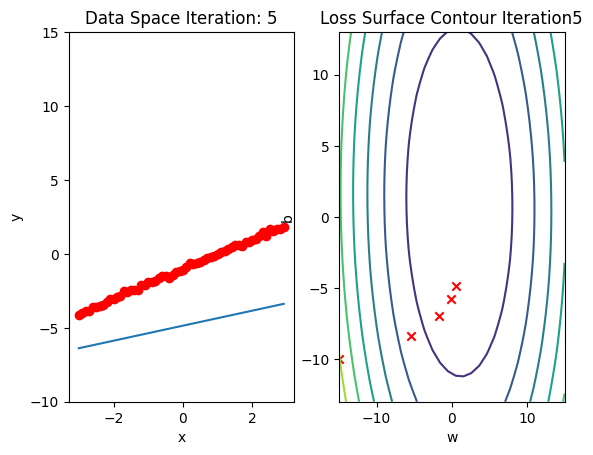

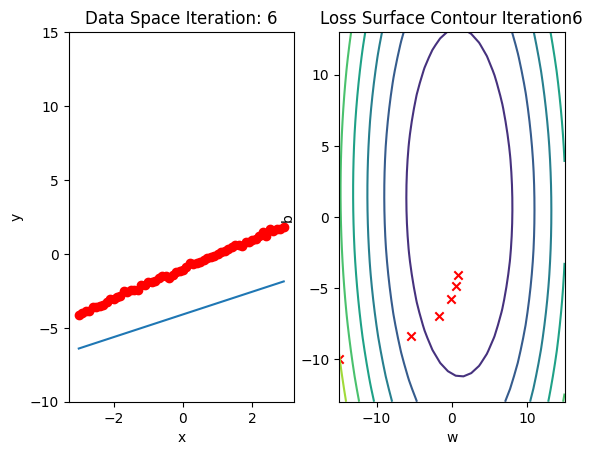

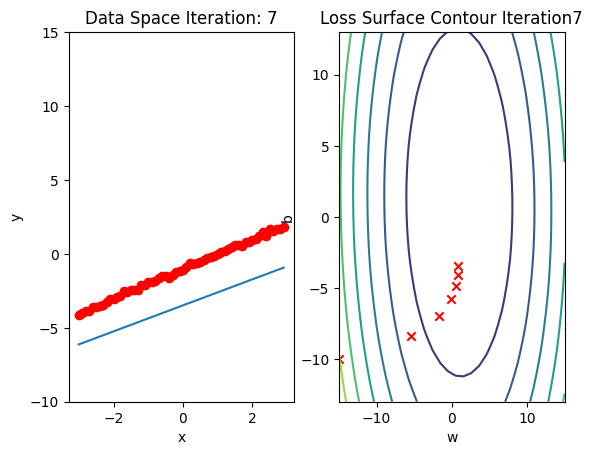

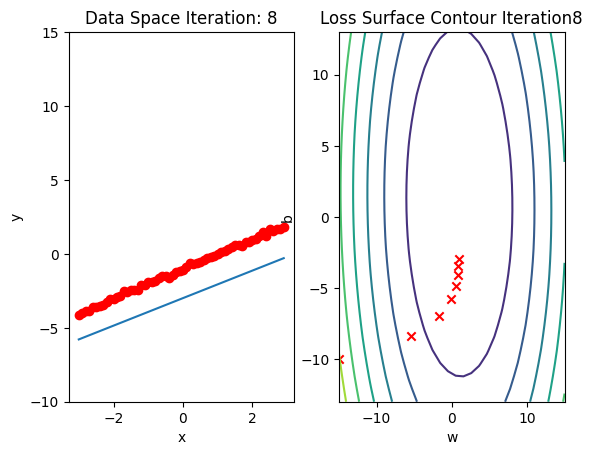

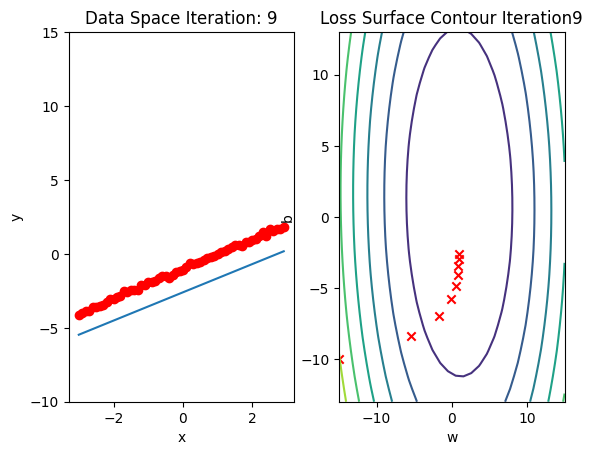

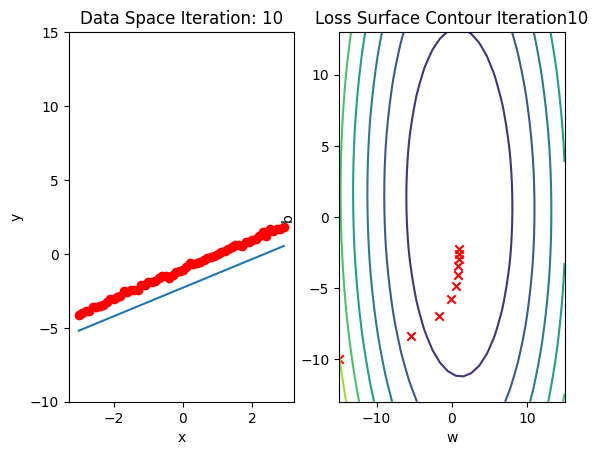

In [95]:
# Train the model with 10 iterations
train_model(10)

In [96]:
# Create plot_error_surfaces for viewing the data
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go=False)

In [97]:
# The function for training the model
LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

def train_model_SGD(iter):
  # Loop
  for epoch in range(iter):
    # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
    Yhat = forward(X)
    # store the loss
    LOSS_SGD.append(criterion(Yhat, Y).tolist())

    for x, y in zip(X, Y):
      # make a pridiction
      yhat = forward(x)
      # calculate the loss
      loss = criterion(yhat, y)
      # Section for plotting
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      # backward pass: compute gradient of the loss with respect to all the learnable parameters
      loss.backward(retain_graph=True)
      # update parameters slope and bias
      w.data = w.data - lr * w.grad.data
      b.data = b.data - lr * b.grad.data
      # zero the gradients before running the backward pass
      w.grad.zero_()
      b.grad.zero_()
    #plot surface and data space after each epoch
    get_surface.plot_ps()

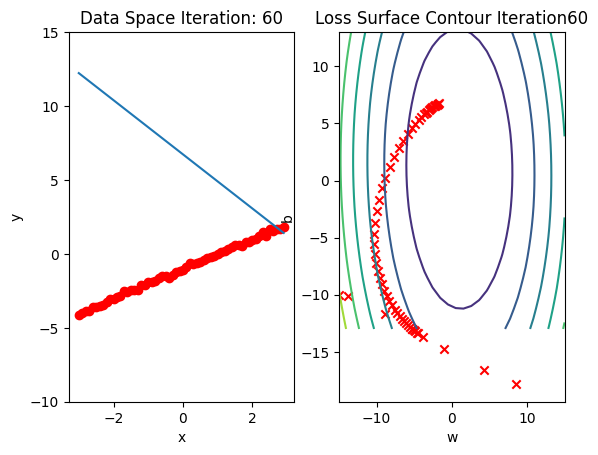

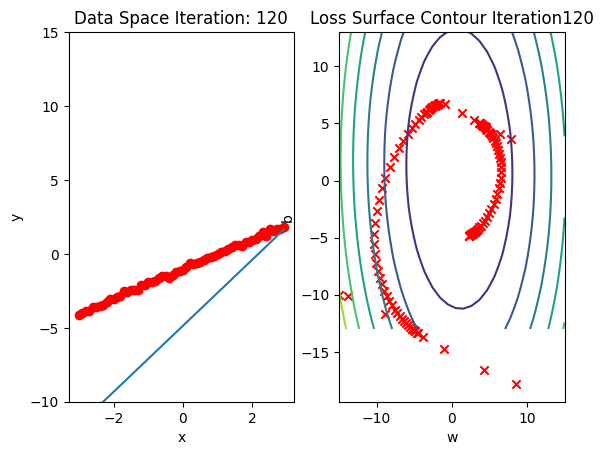

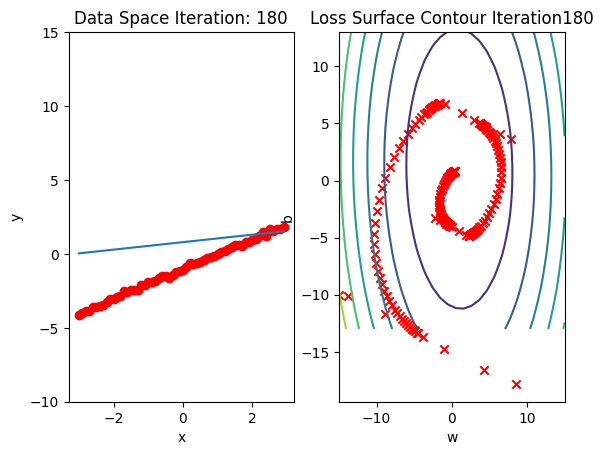

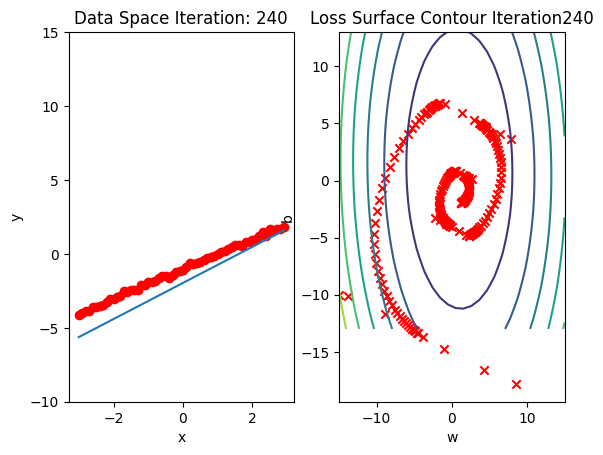

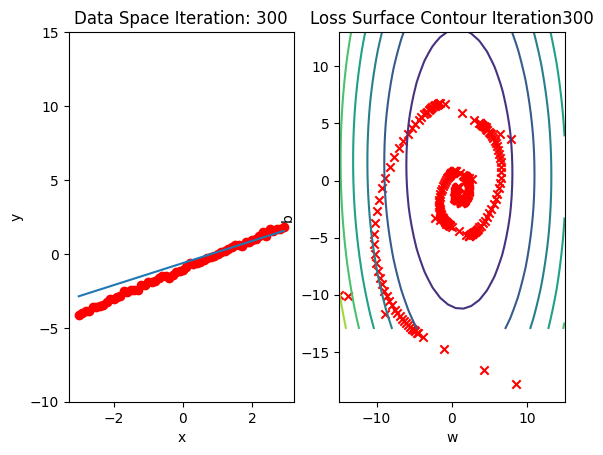

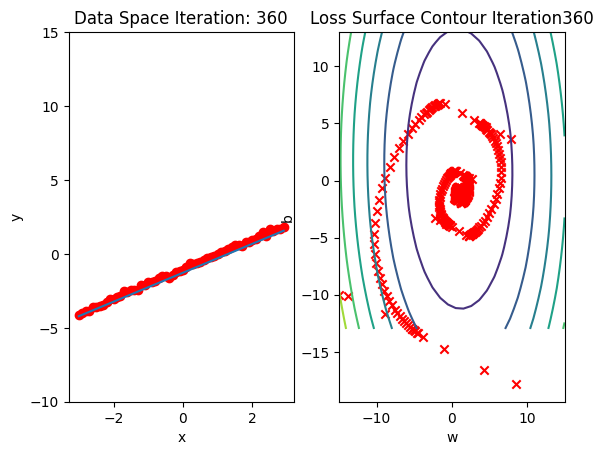

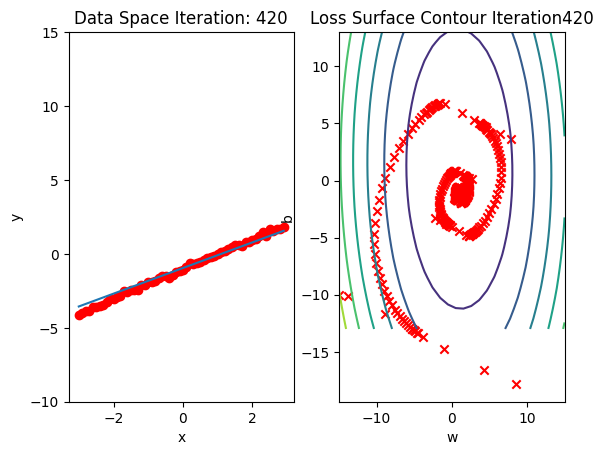

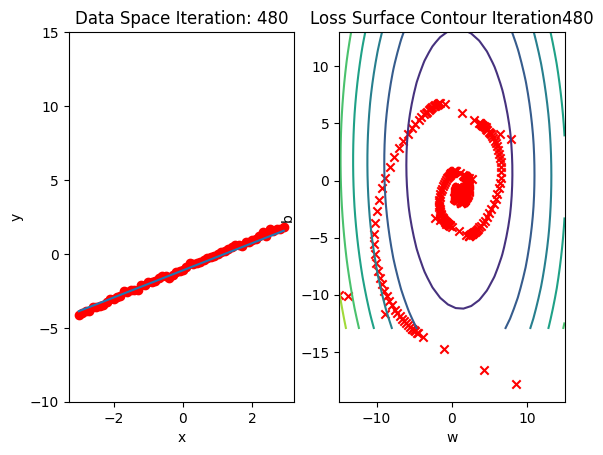

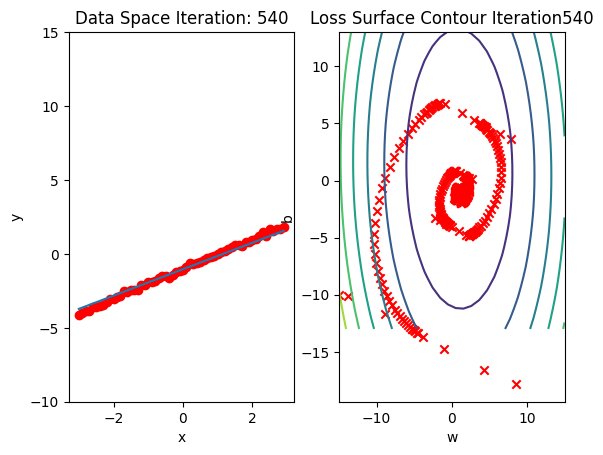

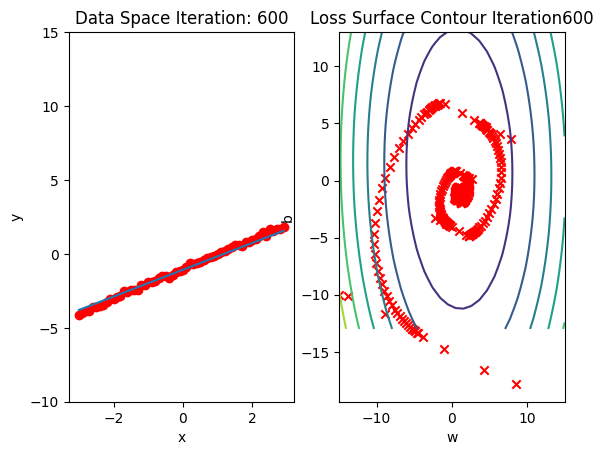

In [98]:
# Train the model with 10 iterations
train_model_SGD(10)

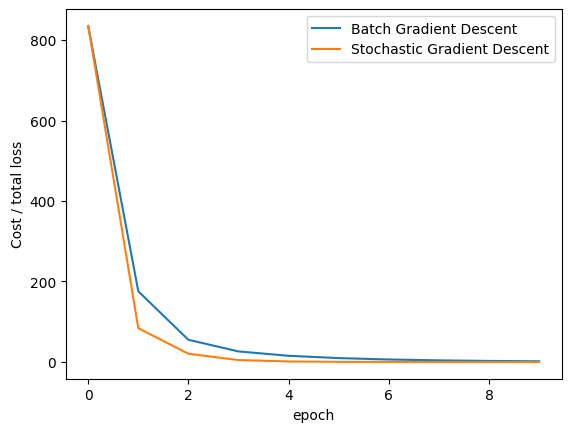

In [99]:
# Plot out the LOSS_BGD and LOSS_SGD
LOSS_BGD = [loss.detach().numpy() for loss in LOSS_BGD]
plt.plot(LOSS_BGD, label="Batch Gradient Descent")
plt.plot(LOSS_SGD, label="Stochastic Gradient Descent")
plt.xlabel("epoch")
plt.ylabel("Cost / total loss")
plt.legend()
plt.show()

In [100]:
# Plot out the LOSS_BGD and LOSS_SGD
from torch.utils.data import Dataset, DataLoader

In [101]:
# Dataset Class
class Data(Dataset):
  # Constructor
  def __init__(self):
    self.x = torch.arange(-3.0, 3.0, 0.1).view(-1, 1)
    self.y = 1 * self.x - 1
    self.len = self.x.shape[0]

  # Getter
  def __getitem__(self, index):
    return self.x[index], self.y[index]

  # Return the length
  def __len__(self):
    return self.len


In [102]:
# Create the dataset and check the length
dataset = Data()
print("The length of dataset is: ", len(dataset))

The length of dataset is:  60


In [103]:
# Print the first point
x, y = dataset[0]
x, y

(tensor([-3.]), tensor([-4.]))

In [104]:
# Print the first 3 point
x, y = dataset[:3]
x, y

(tensor([[-3.0000],
         [-2.9000],
         [-2.8000]]),
 tensor([[-4.0000],
         [-3.9000],
         [-3.8000]]))

In [105]:
# Create plot_error_surfaces for viewing the data
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go=False)

In [106]:
# Create DataLoader
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [107]:
# Create DataLoader
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
LOSS_Loader = []

def train_model_dataLoader(epochs):
  # Loop
  for epoch in range(epochs):
    # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
    Yhat = forward(X)
    # store the loss
    LOSS_Loader.append(criterion(Yhat, Y).tolist())
    for x, y in trainloader:
      # make a prediction
      yhat = forward(x)
      # calculate the loss
      loss = criterion(yhat, y)
      # Section for plotting
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      # Backward pass: compute gradient of the loss with respect to all the learnable parameters
      loss.backward()
      # Update parameters slope
      w.data = w.data - lr * w.grad.data
      b.data = b.data - lr * b.grad.data
      # Clear gradients
      w.grad.zero_()
      b.grad.zero_()
      #plot surface and data space after each epoch
    get_surface.plot_ps()

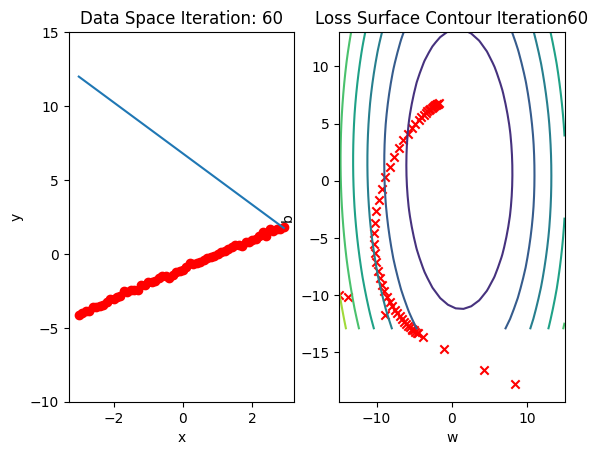

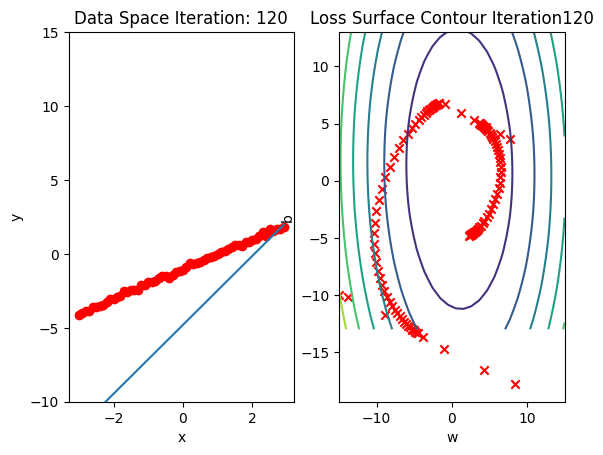

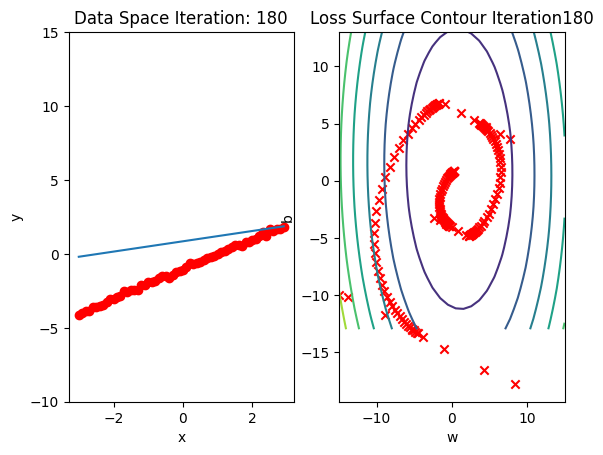

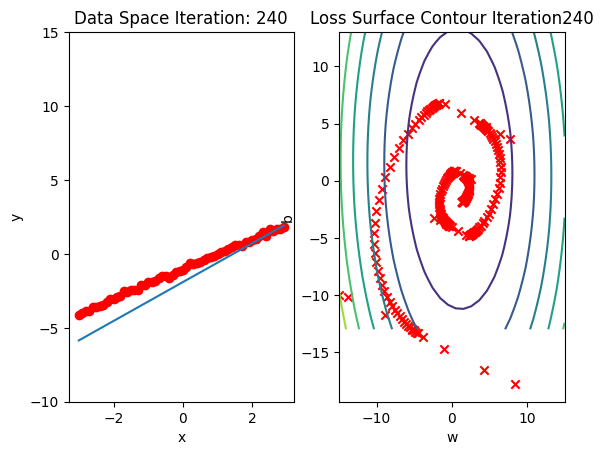

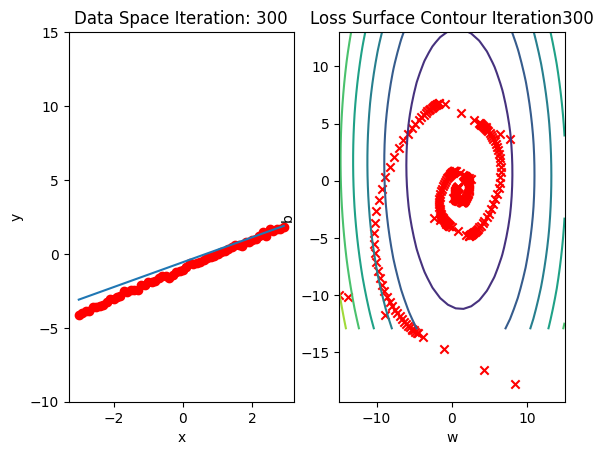

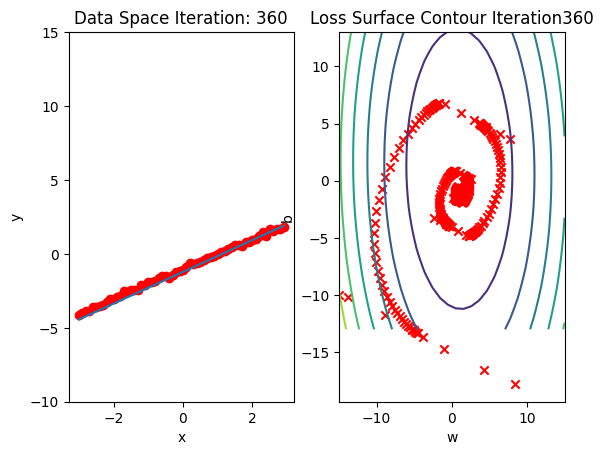

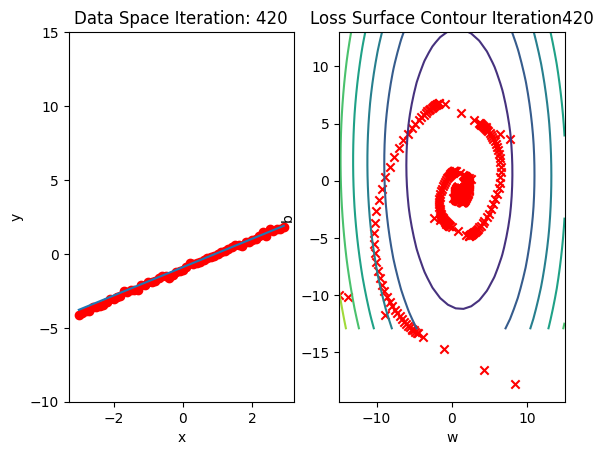

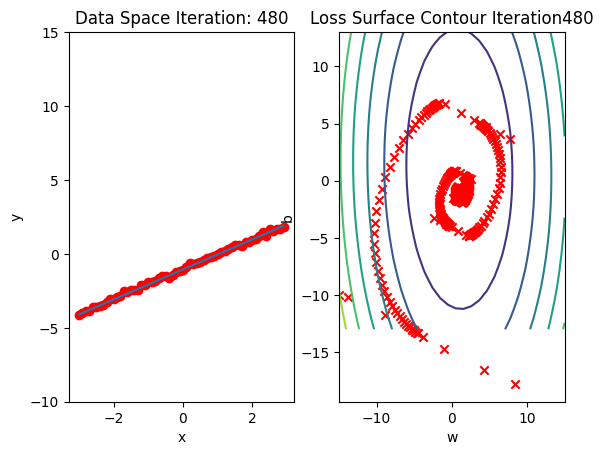

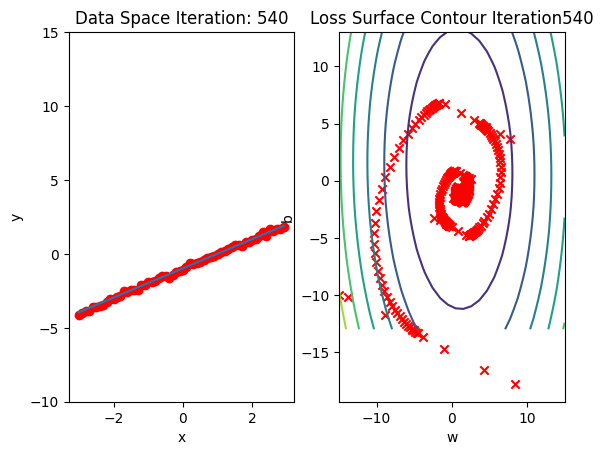

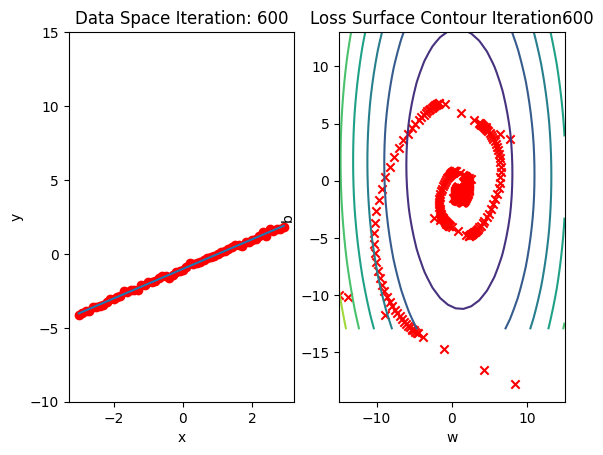

In [108]:
# Run 10 iterations
train_model_dataLoader(10)

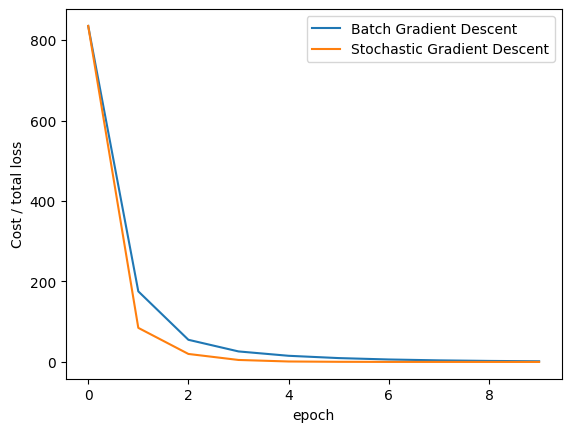

In [109]:
# Plot the LOSS_BGD and LOSS_Loader
plt.plot(LOSS_BGD, label="Batch Gradient Descent")
plt.plot(LOSS_Loader, label="Stochastic Gradient Descent")
plt.xlabel("epoch")
plt.ylabel('Cost / total loss')
plt.legend()
plt.show()

In [110]:
# Practice: Use SGD with trainloader to train model and store the total loss in LOSS
LOSS1 = []
w = torch.tensor(-12.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

def train_my_model(epochs):
  for epoch in range(epochs):
    Yhat = forward(X)
    LOSS1.append(criterion(Yhat, Y).tolist())
    for x, y in trainloader:
      yhat = forward(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()
      w.data = w.data - lr * w.grad.data
      b.data = b.data - lr * b.grad.data
      w.grad.zero_()
      b.grad.zero_()
    get_surface.plot_ps()

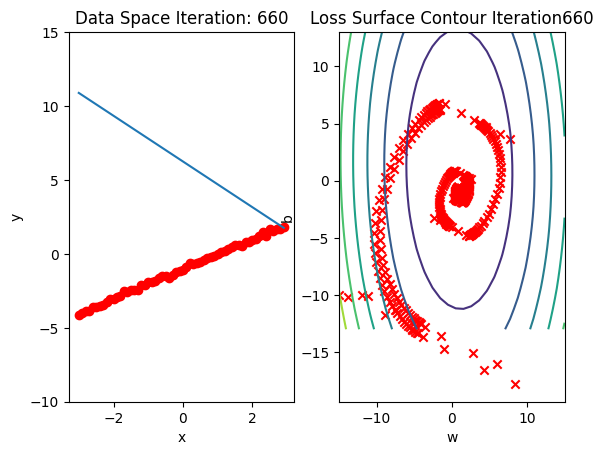

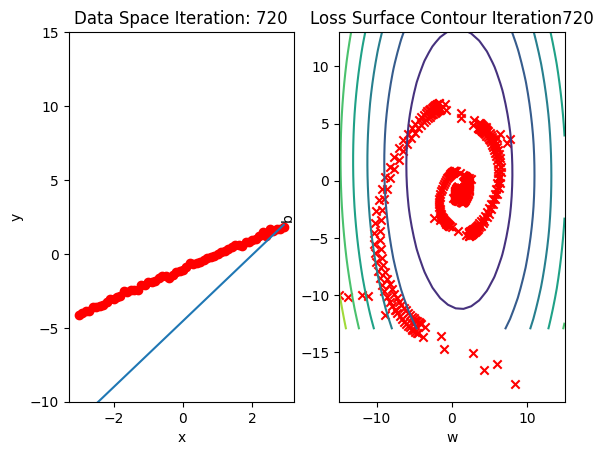

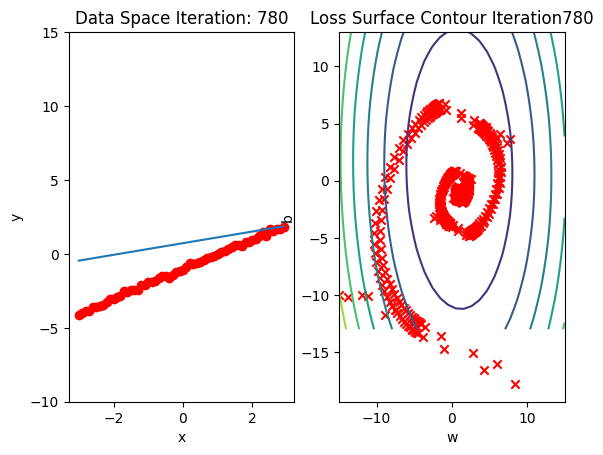

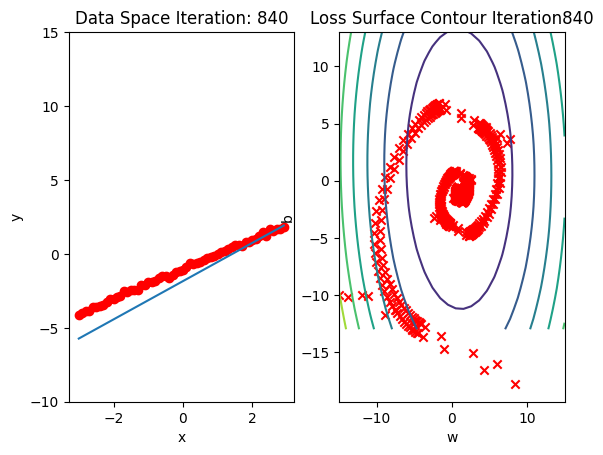

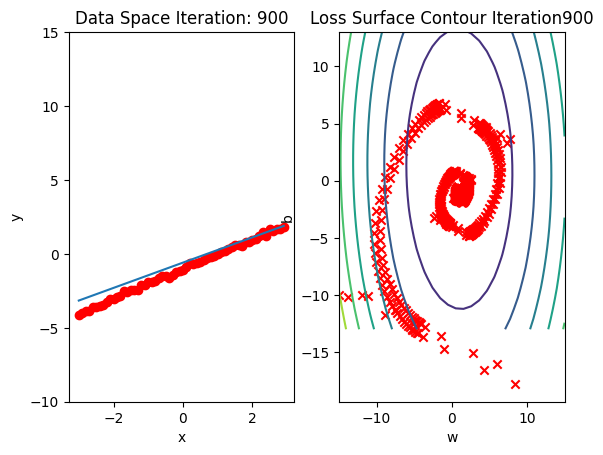

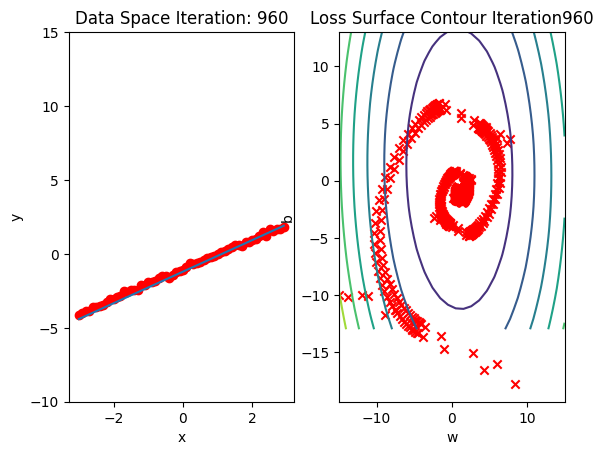

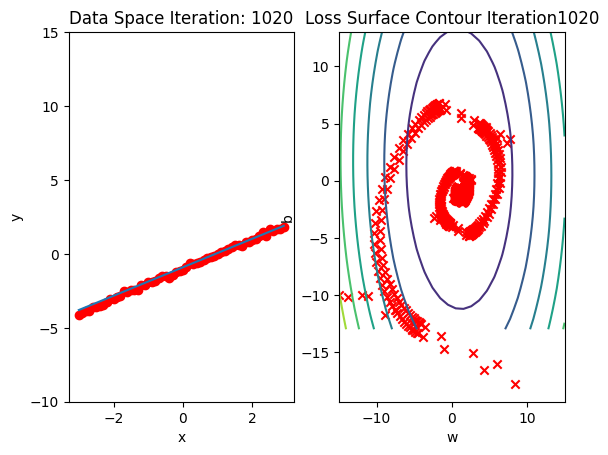

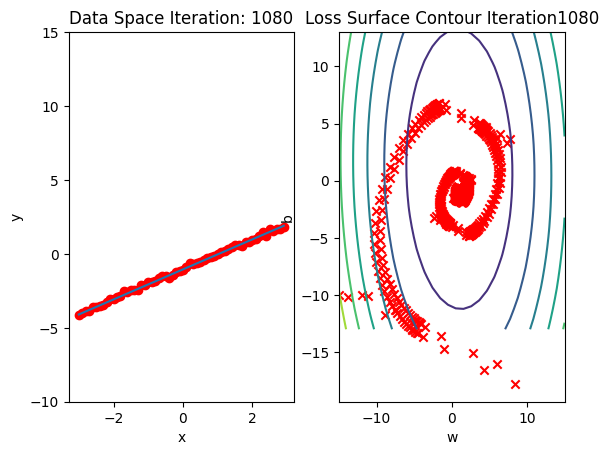

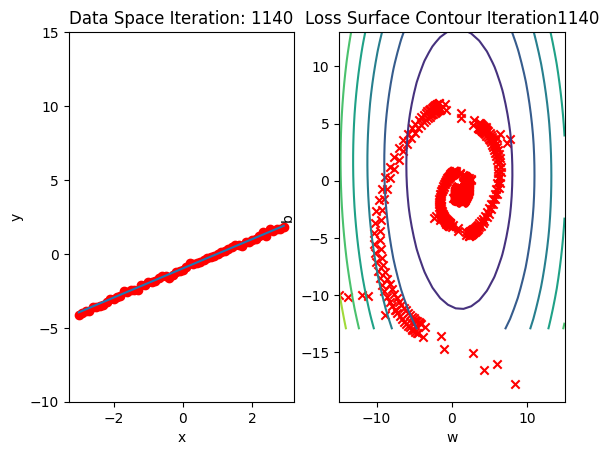

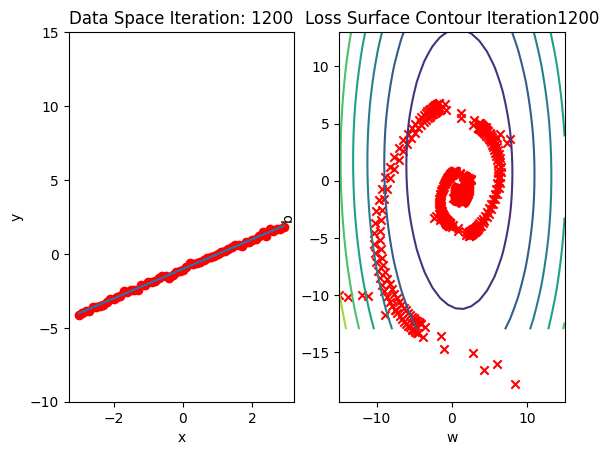

In [111]:
train_my_model(10)

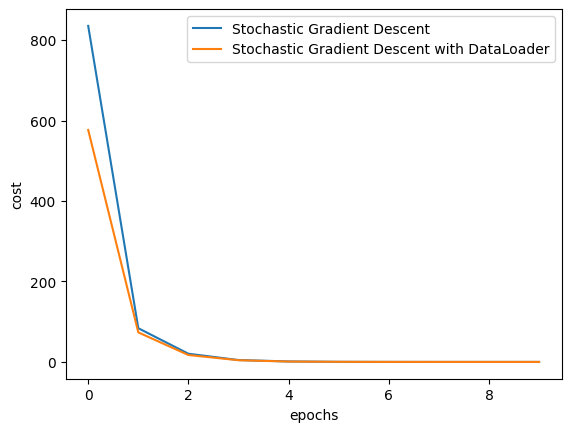

In [112]:
plt.plot(LOSS_SGD, label="Stochastic Gradient Descent")
plt.plot(LOSS1, label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()
plt.show()

## Linear Regression 1D: Training Two Parameter Mini-Batch Gradient Decent

In [113]:
# Import the libraries we need for this lab
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [114]:
# The class for plotting the diagrams
class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

     # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data Space Iteration: '+ str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [115]:
# Import PyTorch library
import torch
torch.manual_seed(1)

In [116]:
# Generate the data with noise and the line
X = torch.arange(-3.0, 3.0, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

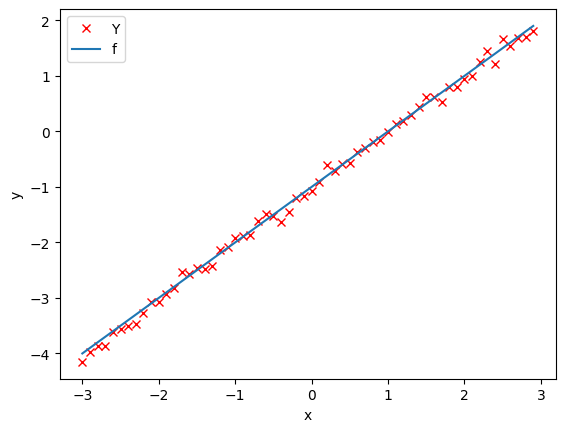

In [117]:
# Plot the line and the data
plt.plot(X.numpy(), Y.numpy(), 'rx', label='Y')
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [118]:
# Define the prediction function
def forward(x):
  return w*x+b

In [119]:
# Define the cost function
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

<Figure size 640x480 with 0 Axes>

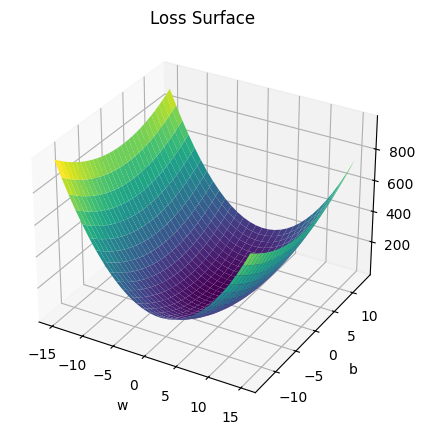

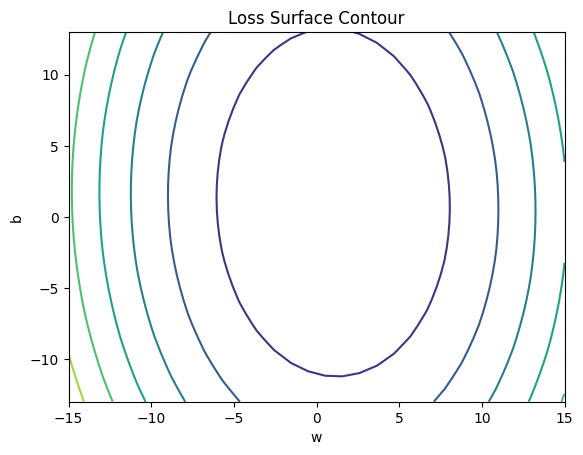

In [120]:
# Create a plot_error_surfaces object.
get_surface = plot_error_surfaces(15,13,X,Y,30)

In [121]:
# Define the function for training model
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
lr = 0.1
LOSS_BGD = []

def train_model_BGD(epochs):
  for epoch in range(epochs):
    yhat = forward(X)
    loss = criterion(yhat, Y)
    LOSS_BGD.append(loss)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    get_surface.plot_ps()
    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

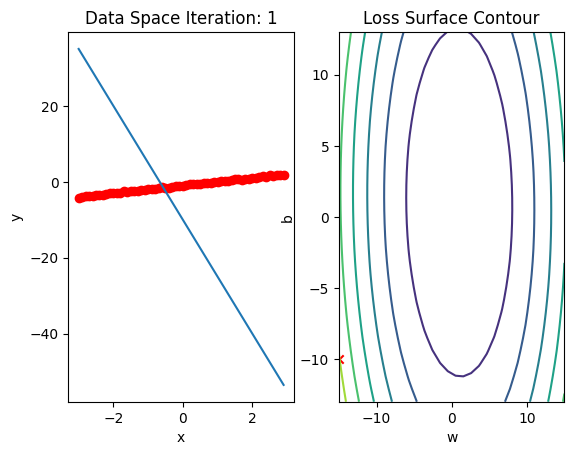

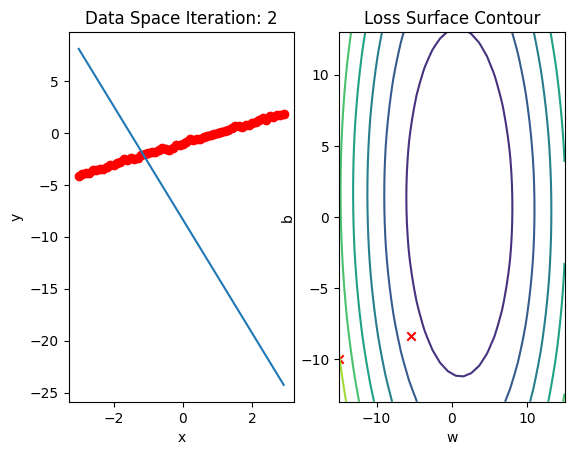

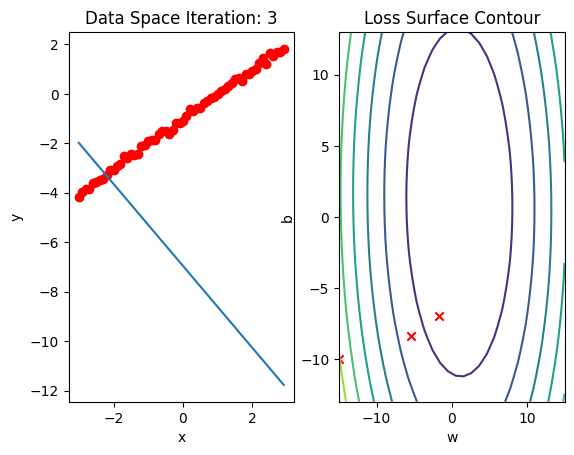

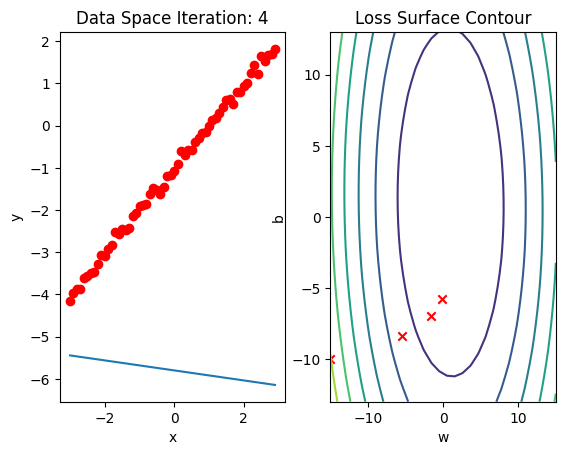

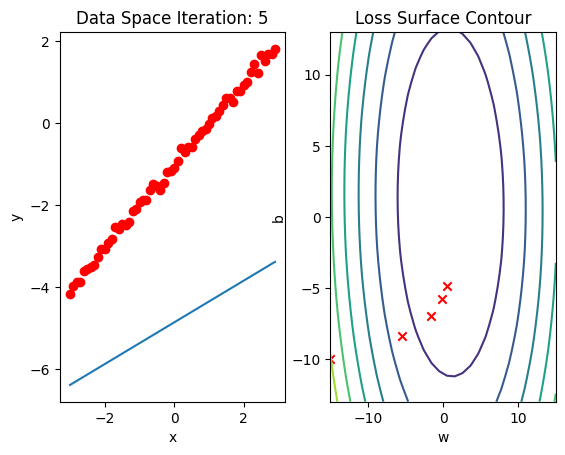

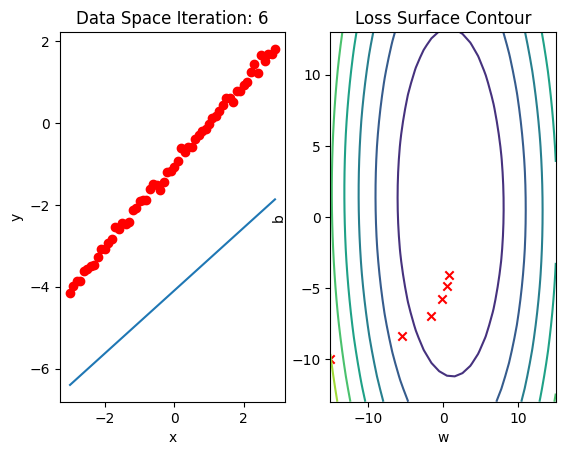

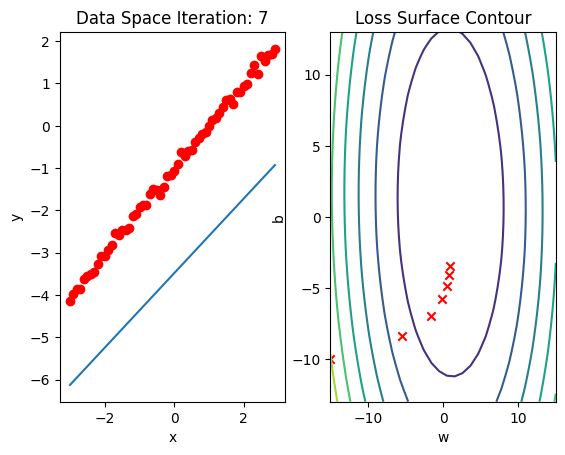

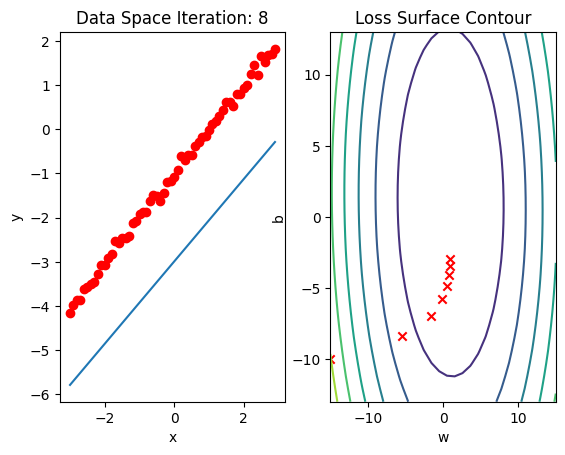

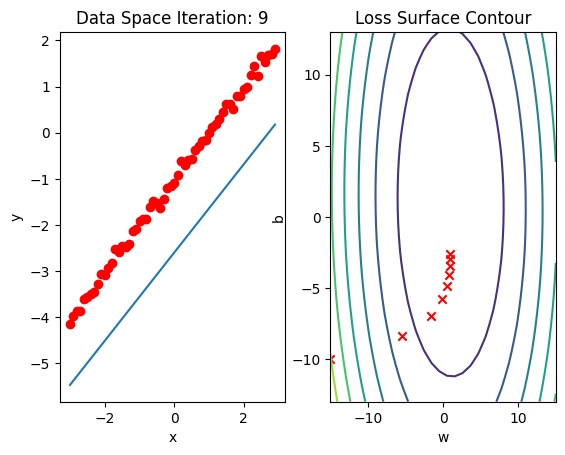

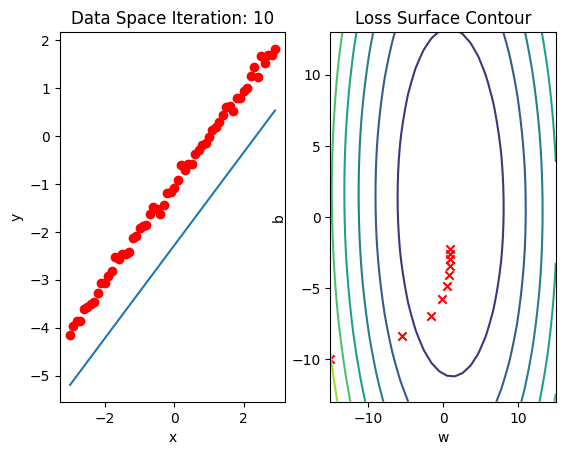

In [122]:
# Run train_model_BGD with 10 iterations
train_model_BGD(10)

In [123]:
# Create a plot_error_surfaces object.
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go=False)

In [124]:
# Import libraries
from torch.utils.data import Dataset, DataLoader

In [125]:
# Create class Data
class Data(Dataset):

  # Constructor
  def __init__(self):
    self.x = torch.arange(-3.0, 3.0, 0.1).view(-1, 1)
    self.y = 1 * X - 1
    self.len = self.x.shape[0]

  # Getter
  def __getitem__(self, index):
    return self.x[index], self.y[index]

  # Get length
  def __len__(self):
    return self.len

In [126]:
# Create Data object and DataLoader object
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [127]:
# Define train_model_SGD function
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
LOSS_SGD = []

def train_model_SGD_1(epochs):
  for epoch in range(epochs):
    Yhat = forward(X)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
    get_surface.plot_ps()
    LOSS_SGD.append(criterion(forward(X), Y).tolist())
    for x, y in trainloader:
      yhat = forward(x)
      loss = criterion(yhat, y)
      loss.backward()
      w.data  = w.data - lr * w.grad.data
      b.data = b.data - lr * b.grad.data
      w.grad.data.zero_()
      b.grad.data.zero_()
    get_surface.plot_ps()

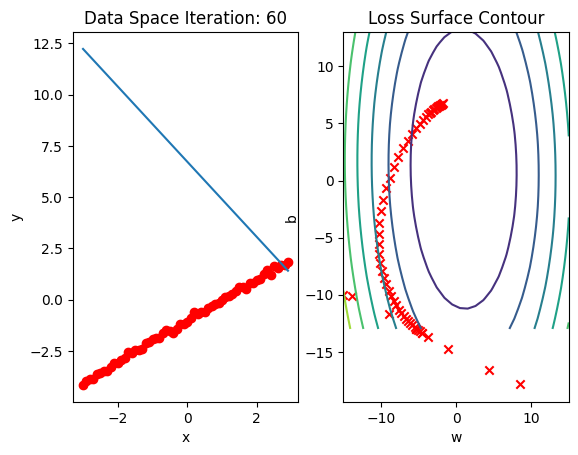

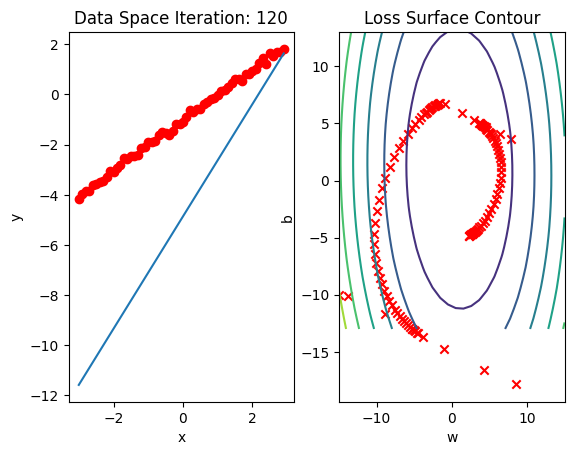

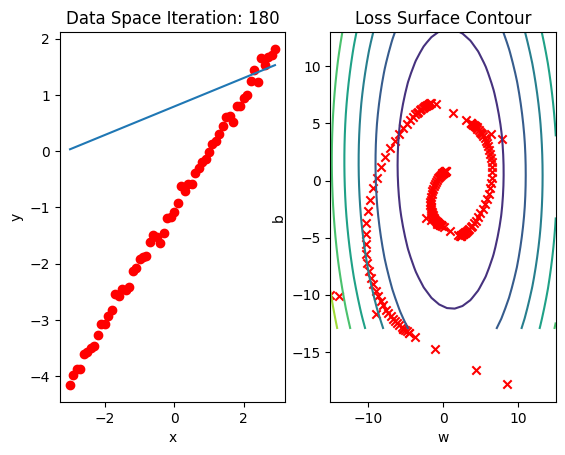

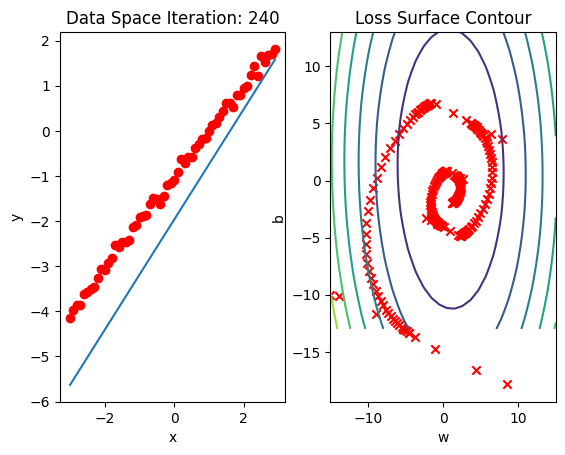

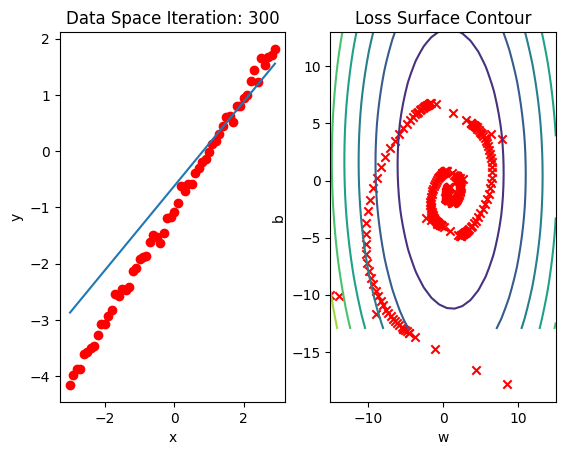

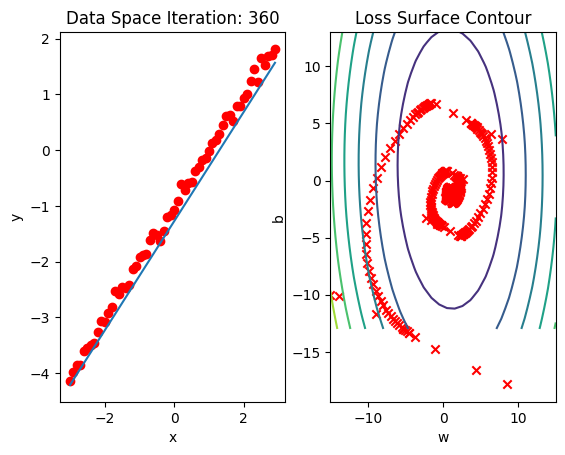

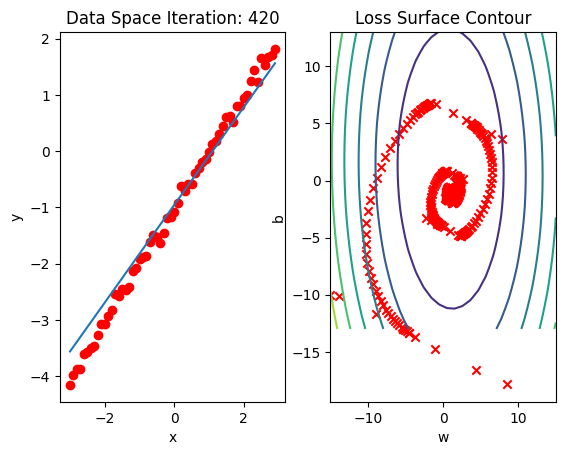

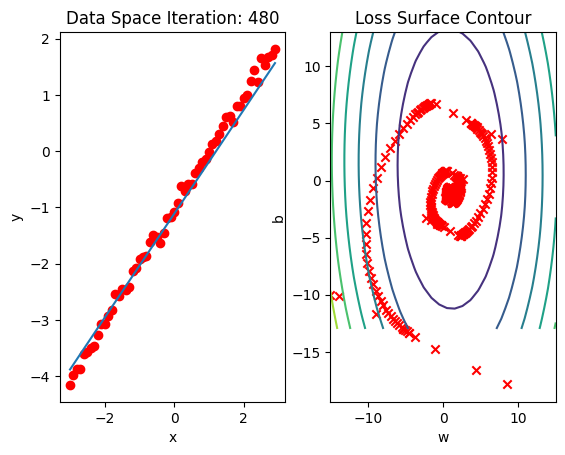

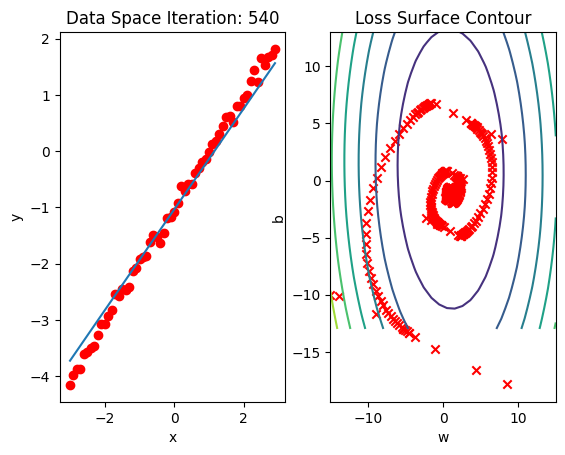

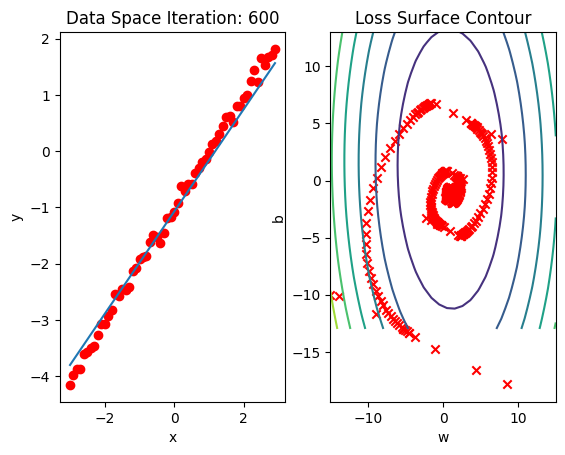

In [128]:
# Run train_model_SGD(iter) with 10 iterations
train_model_SGD(10)

In [129]:
# Create a plot_error_surfaces object.
get_surface =  plot_error_surfaces(15,13,X,Y,30,go=False)

In [130]:
# Create DataLoader object and Data object
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=5)

In [131]:
# Define train_model_Mini5 function
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
LOSS_MINIS = []
lr = 0.1

def train_model_Mini5(epochs):
  for epoch in range(epochs):
    Yhat = forward(X)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(),  criterion(forward(X), Y).tolist())
    get_surface.plot_ps()
    LOSS_MINIS.append(criterion(forward(X), Y).tolist())
    for x, y in trainloader:
      yhat = forward(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()
      w.data = w.data -lr * w.grad.data
      b.data = b.data - lr * b.grad.data
      w.grad.data.zero_()
      b.grad.data.zero_()


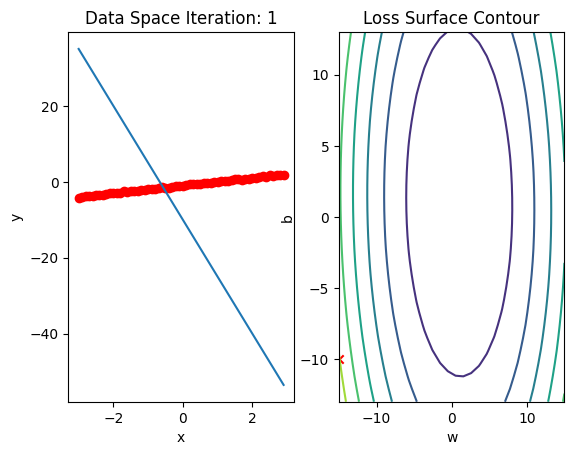

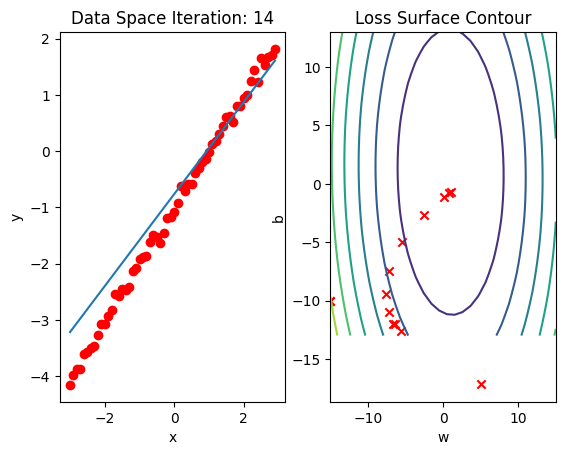

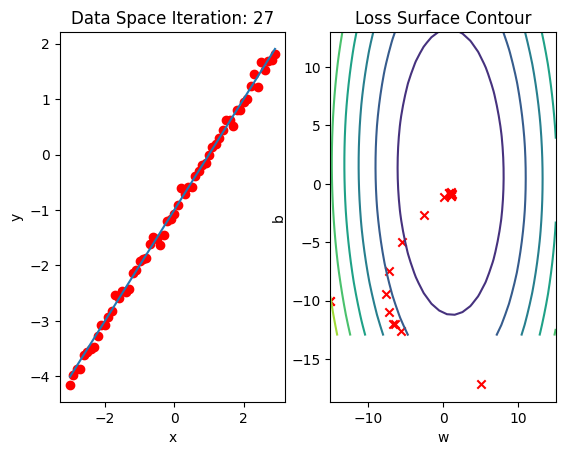

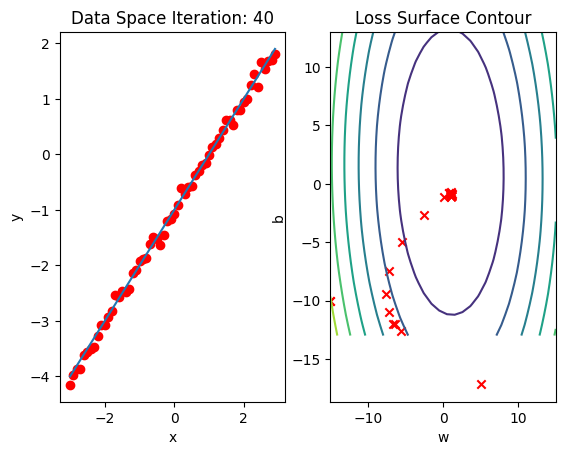

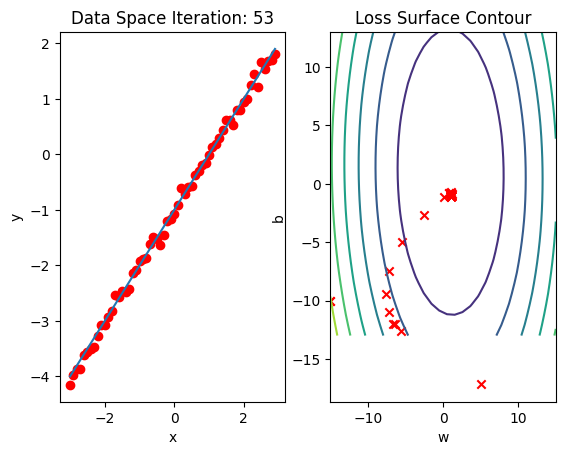

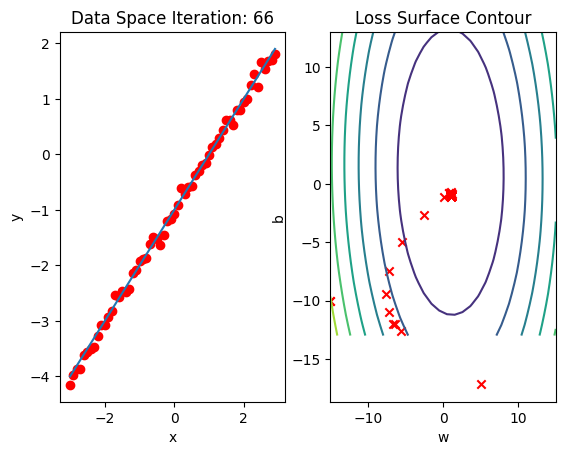

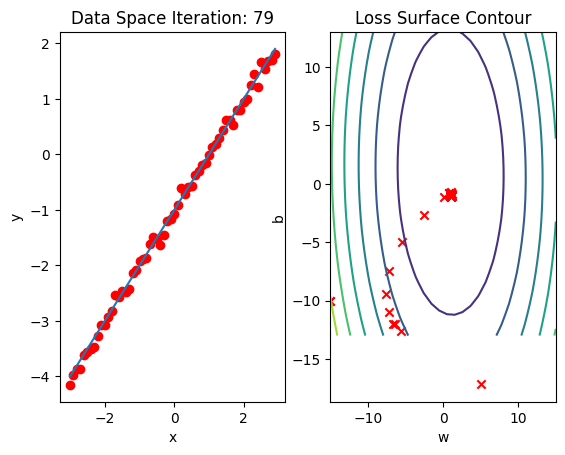

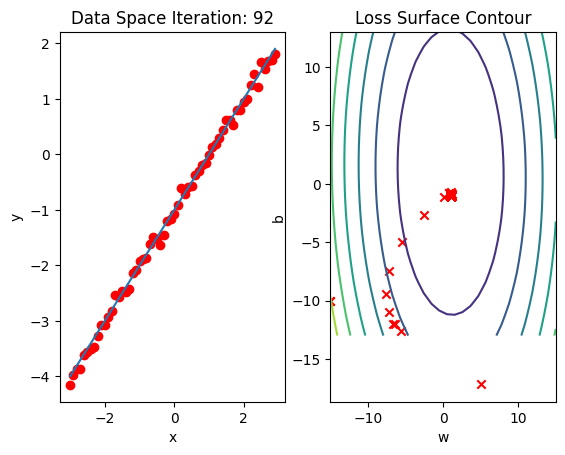

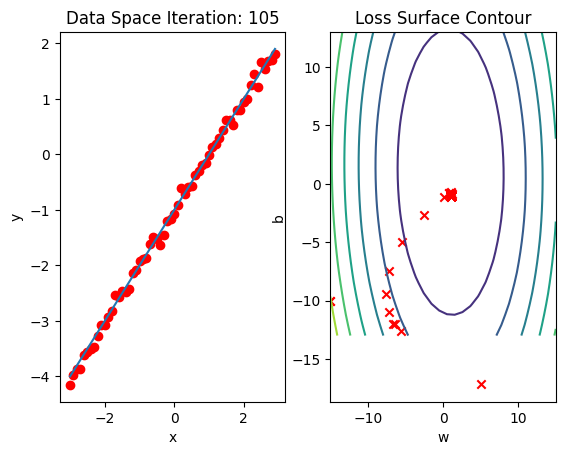

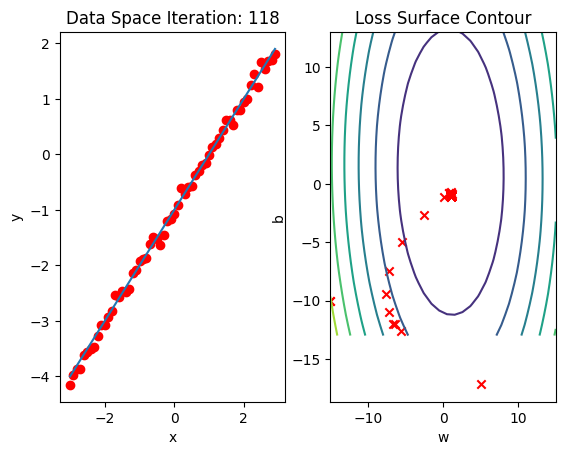

In [132]:
# Run train_model_Mini5 with 10 iterations.
train_model_Mini5(10)

In [133]:
# Create a plot_error_surfaces object.
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go=False)

In [134]:
# Create DataLoader object
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=10)

In [135]:
# Define train_model_Mini5 function
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
lr=0.1
LOSS_MINI10 = []

def train_model_Mini10(epochs):
  for epoch in range(epochs):
    Yhat = forward(X)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
    get_surface.plot_ps()
    LOSS_MINI10.append(criterion(forward(X), Y).tolist())
    for x, y in trainloader:
      yhat = forward(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()
      w.data = w.data - lr * w.grad.data
      b.data = b.data-lr * b.grad.data
      w.grad.data.zero_()
      b.grad.data.zero_()

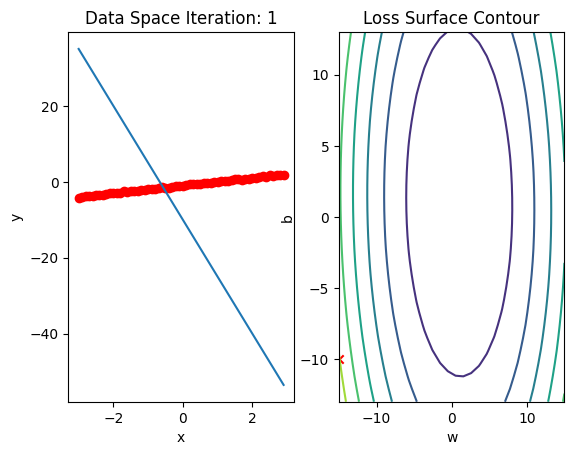

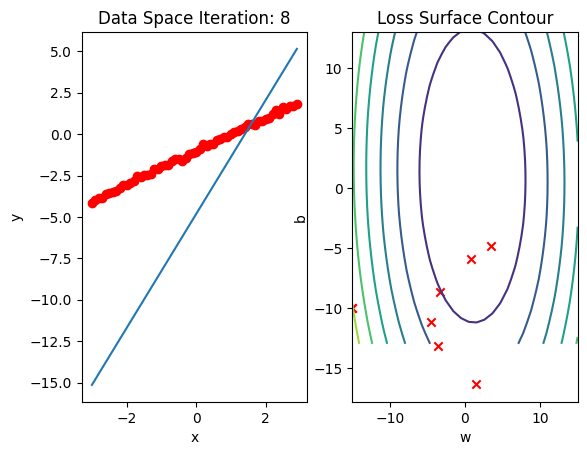

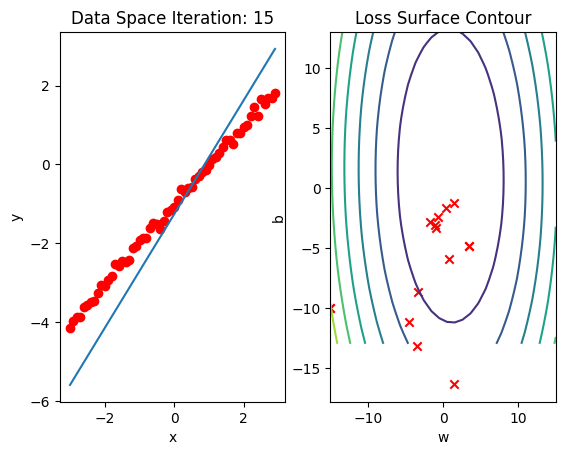

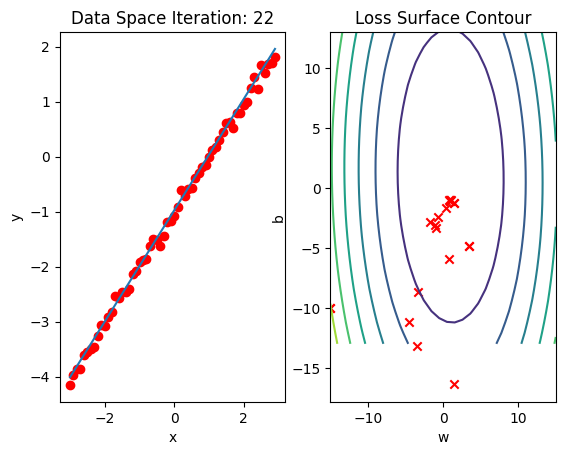

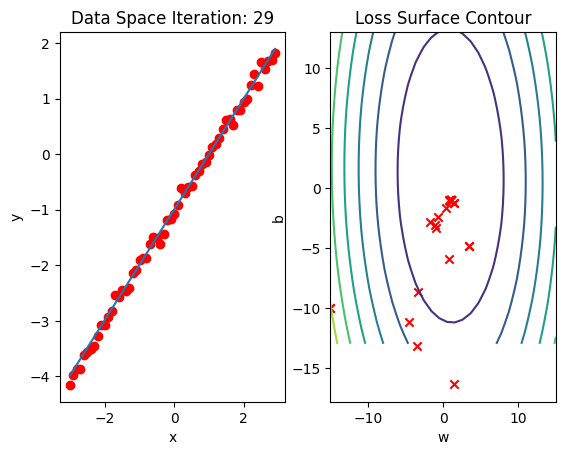

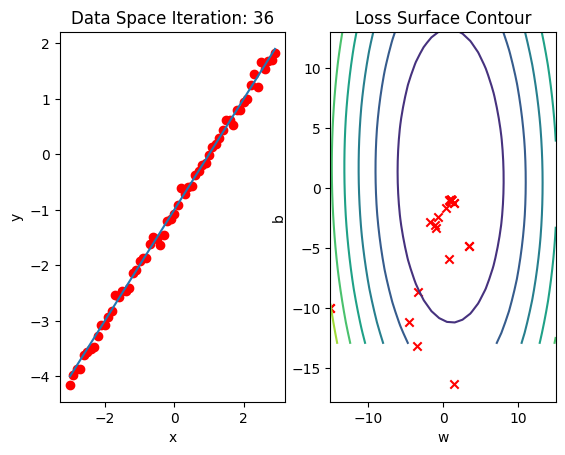

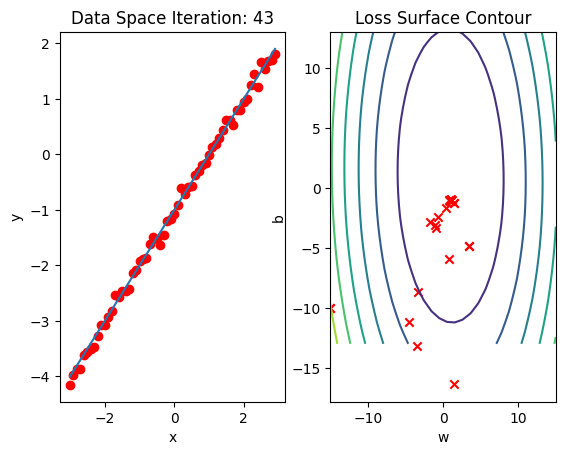

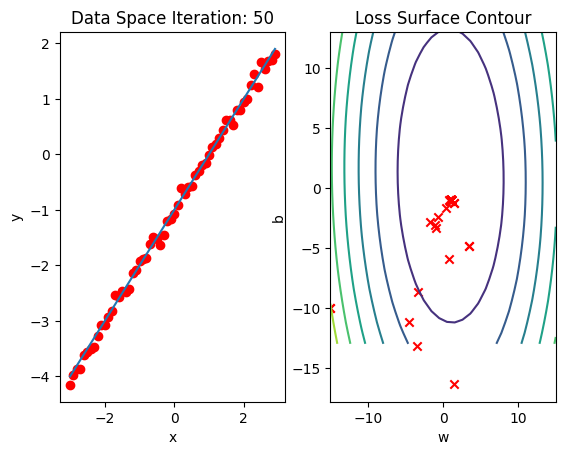

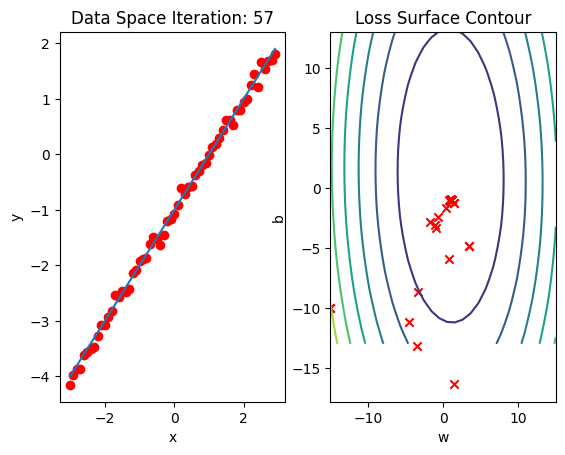

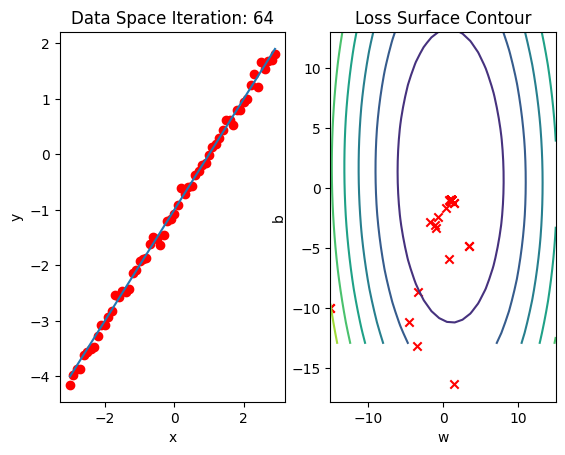

In [136]:
# Run train_model_Mini5 with 10 iterations.
train_model_Mini10(10)

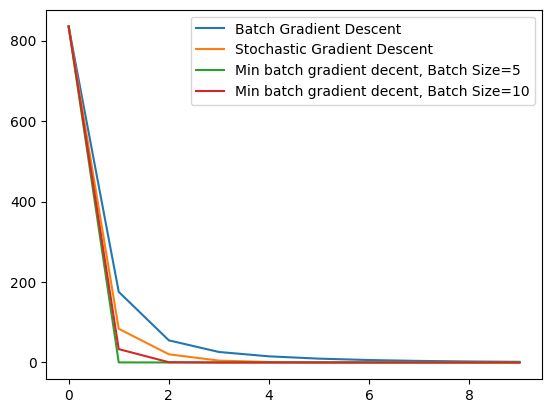

In [137]:
# Plot out the LOSS for each method
LOSS_BGD = [loss.detach().numpy() for loss in LOSS_BGD]
plt.plot(LOSS_BGD, label="Batch Gradient Descent")
plt.plot(LOSS_SGD, label="Stochastic Gradient Descent")
plt.plot(LOSS_MINIS, label="Min batch gradient decent, Batch Size=5")
plt.plot(LOSS_MINI10, label="Min batch gradient decent, Batch Size=10")
plt.legend()

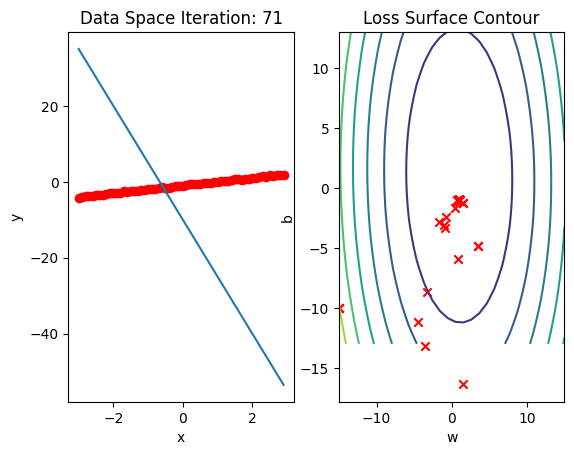

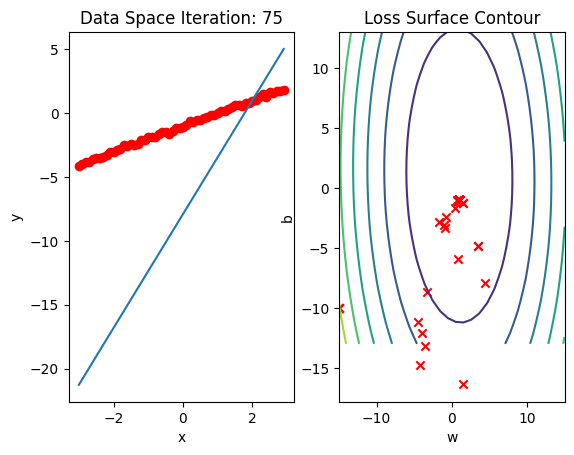

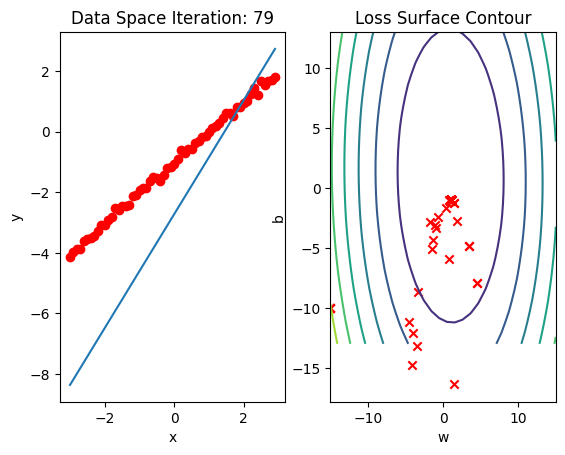

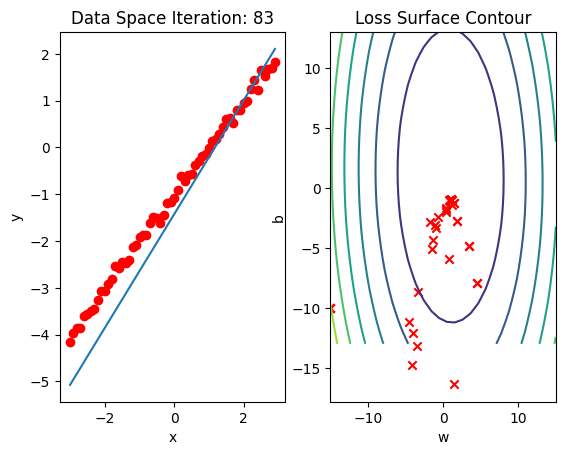

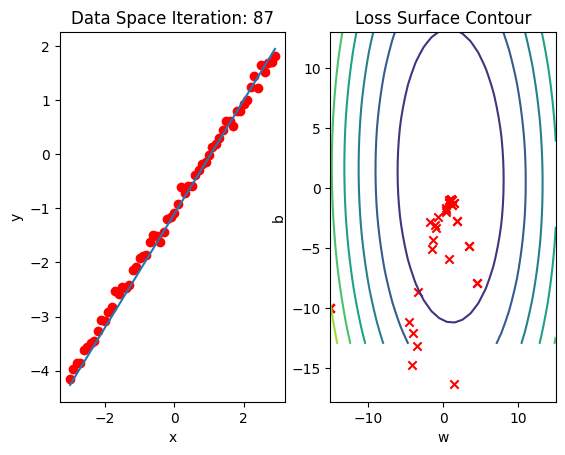

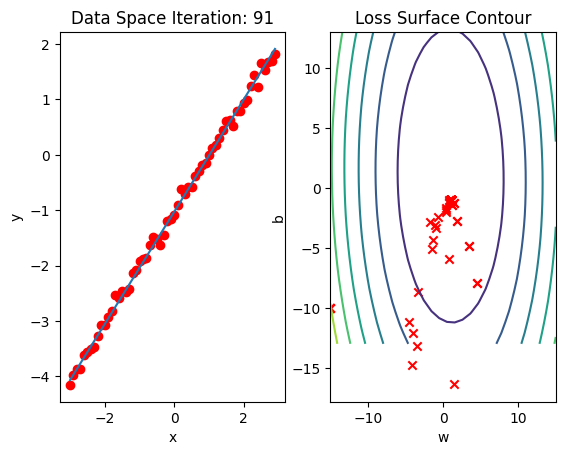

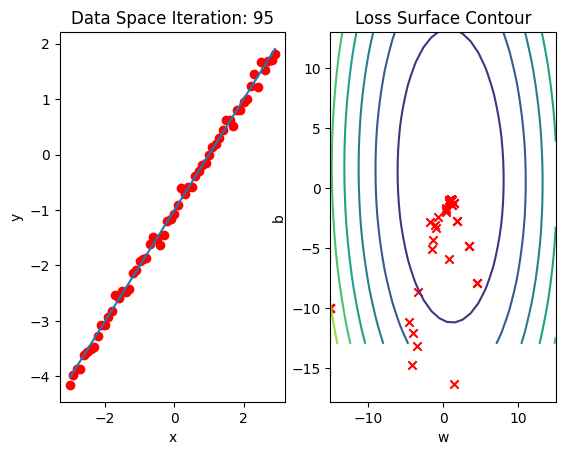

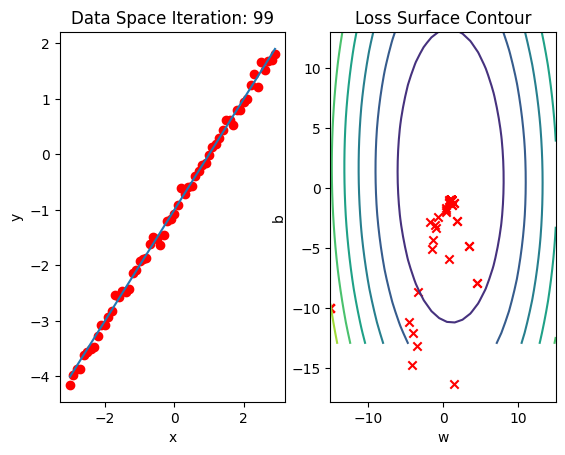

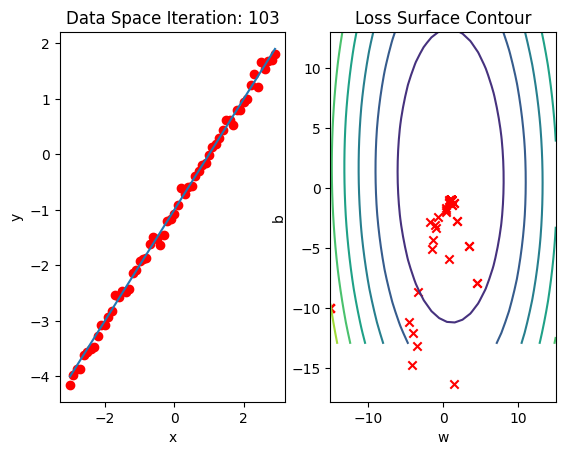

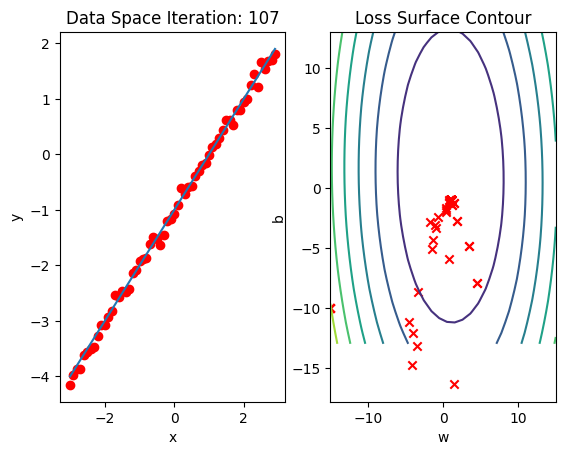

In [138]:
# Practice: Perform mini batch gradient descent with a batch size of 20.

dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=20)
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
lr=0.1
LOSS_MINI20 = []

def train_model_Mini20(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI20.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
train_model_Mini20(10)

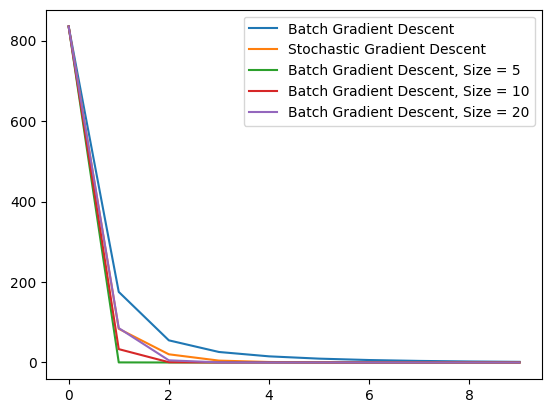

In [139]:
# Practice: Plot a graph to show all the LOSS functions

# Type your code here
plt.plot(LOSS_BGD, label='Batch Gradient Descent')
plt.plot(LOSS_SGD, label='Stochastic Gradient Descent')
plt.plot(LOSS_MINIS, label='Batch Gradient Descent, Size = 5')
plt.plot(LOSS_MINI10, label='Batch Gradient Descent, Size = 10')
plt.plot(LOSS_MINI20, label='Batch Gradient Descent, Size = 20')
plt.legend()
plt.show()

## Linear Regression 1D: Training Two Parameter Mini-Batch Gradient Descent

In [140]:
# These are the libraries we are going to use in the lab.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [141]:
# class for ploting
class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [142]:
# Import libraries and set random seed
import torch
from torch.utils.data import Dataset, dataloader
torch.manual_seed(1)

In [143]:
# Create Data Class
class Data(Dataset):

  # Constructor
  def __init__(self):
    self.x = torch.arange(-3.0, 3.0, 0.1).view(-1, 1)
    self.f = 1 * self.x - 1
    self.y = self.f + 0.1 * torch.randn(self.x.size())
    self.len = self.x.shape[0]

  # Getter
  def __getitem__(self, index):
    return self.x[index], self.y[index]

  # Get Length
  def __len__(self):
    return self.len

In [144]:
# Create dataset object
dataset = Data()

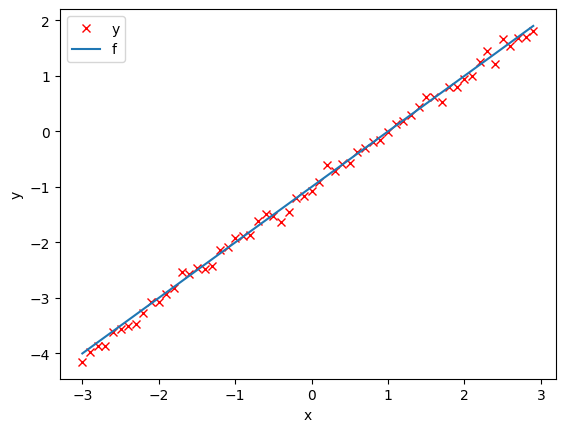

In [145]:
# Plot the data
plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label='y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [146]:
# Create a linear regression model class
from torch import nn, optim

class linear_regression(nn.Module):

  # Constructor
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  # Prediction
  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [147]:
# Build in cost function
criterion = nn.MSELoss()

In [148]:
# Create optimizer
model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [149]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3636]], requires_grad=True),
 Parameter containing:
 tensor([0.4957], requires_grad=True)]

In [150]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [151]:
# Create Dataloader object
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [152]:
# Customize the weight and bias
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [153]:
# Create plot surface object
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go=False)

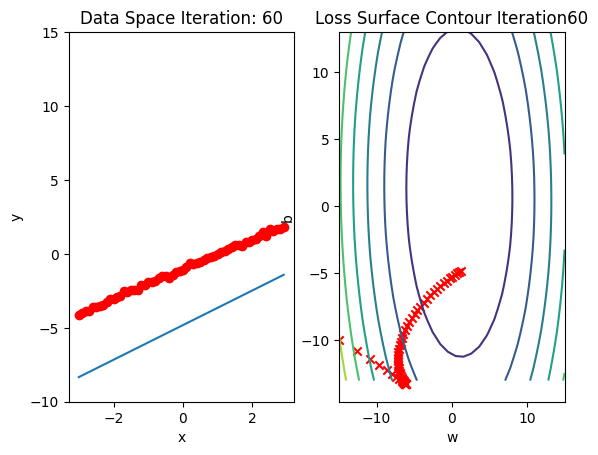

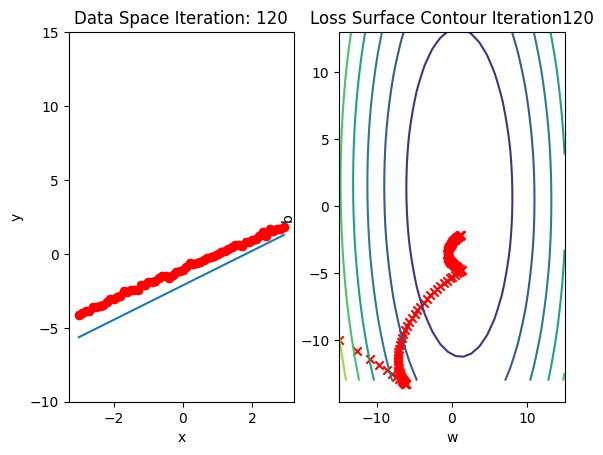

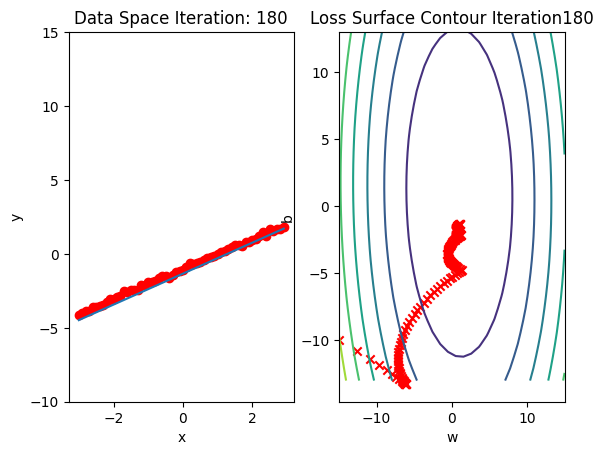

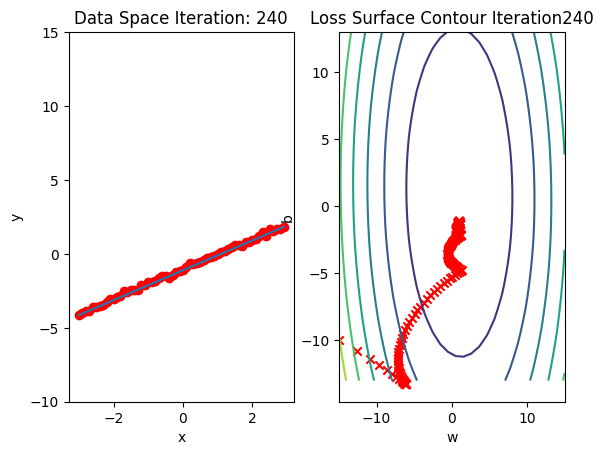

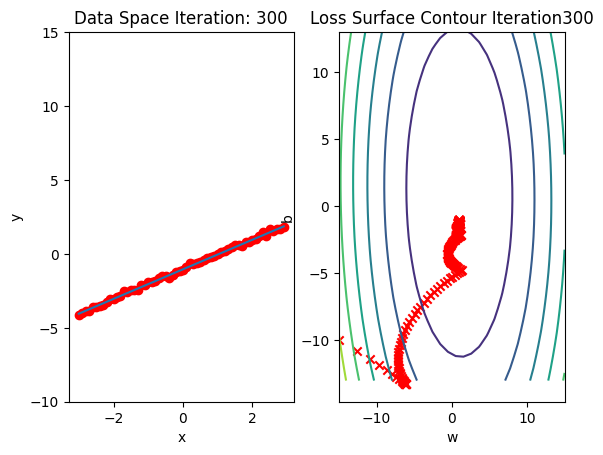

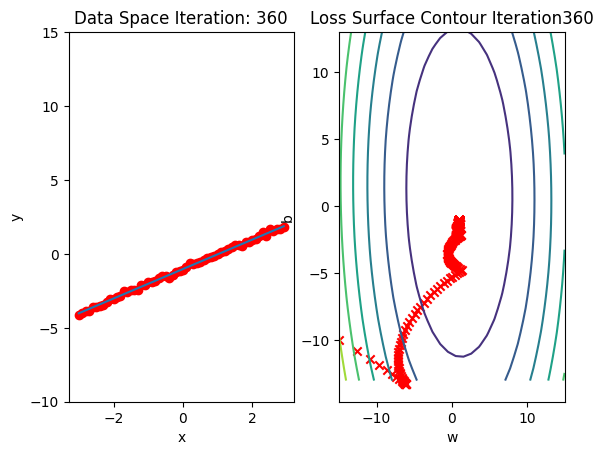

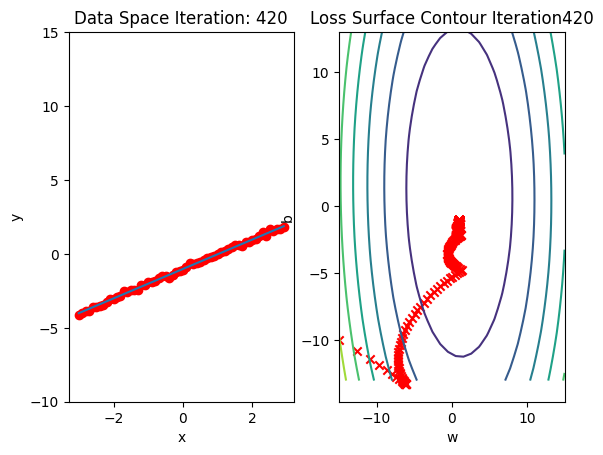

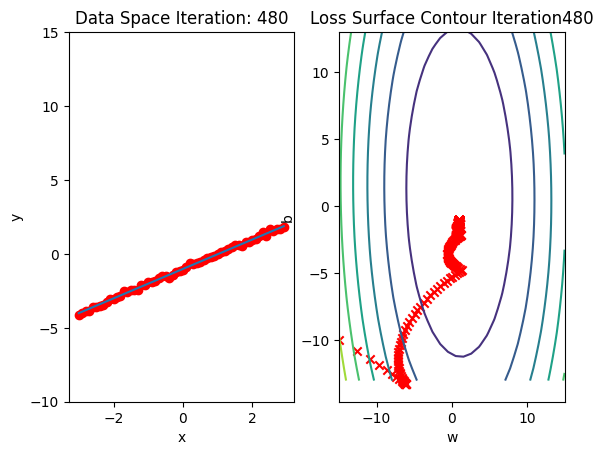

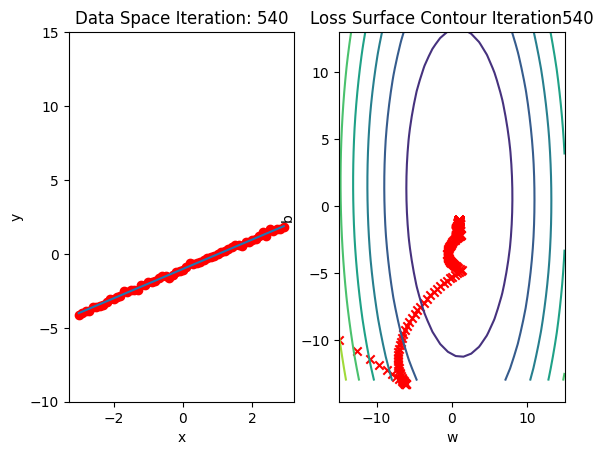

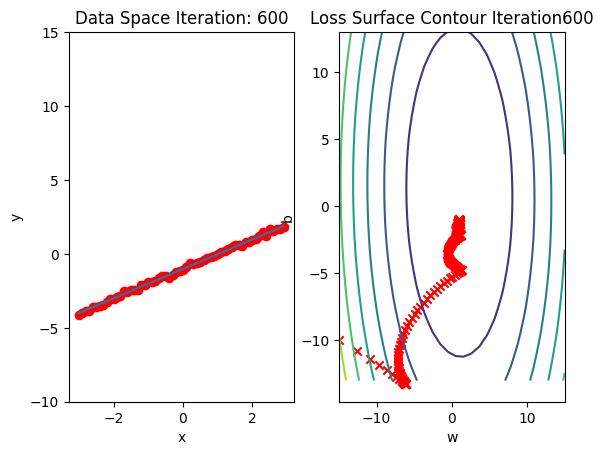

In [154]:
# Train Model
def train_model_BGD(iter):
  for epoch in range(iter):
    for x, y in trainloader:
      yhat = model(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(model, loss.tolist())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    get_surface.plot_ps()
train_model_BGD(10)

In [155]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.9932]])),
             ('linear.bias', tensor([-1.0174]))])

Let's use the following diagram to help clarify the process. The model takes x to produce an estimate yhat, it will then be compared to the actual y with the loss function.

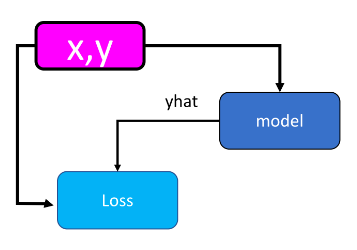

When we call backward() on the loss function, it will handle the differentiation. Calling the method step on the optimizer object it will update the parameters as they were inputs when we constructed the optimizer object. The connection is shown in the following figure :

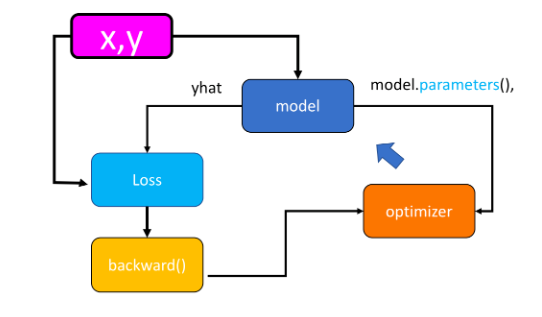

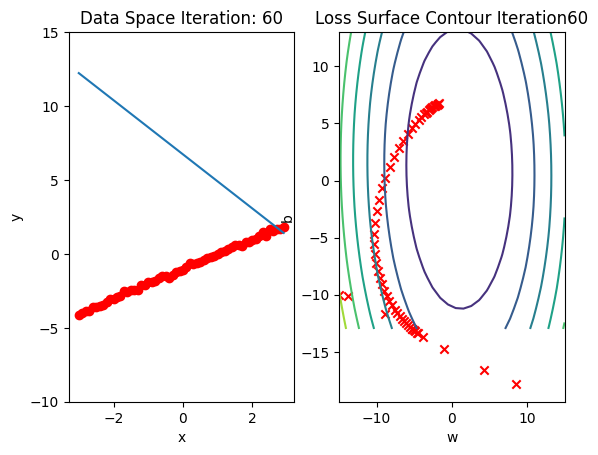

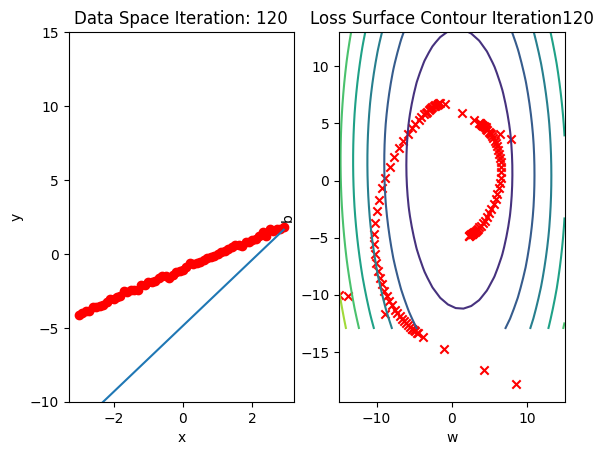

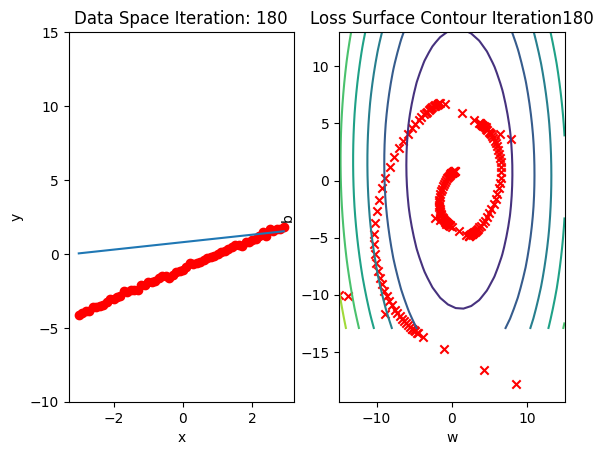

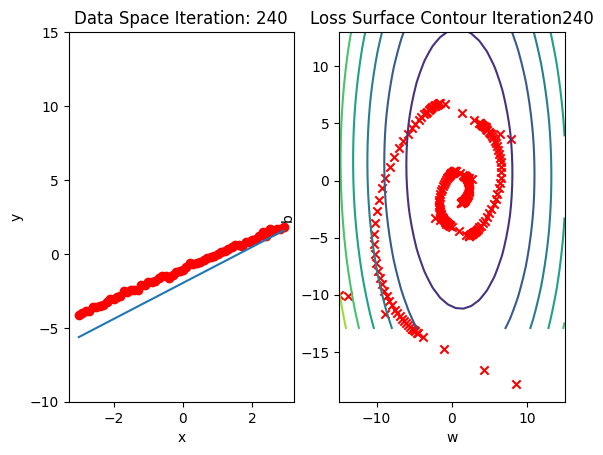

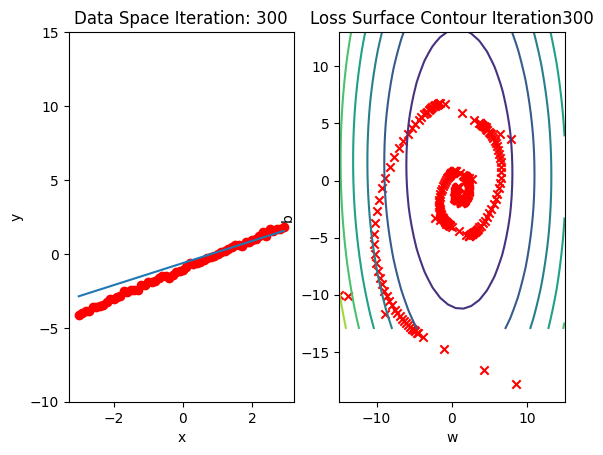

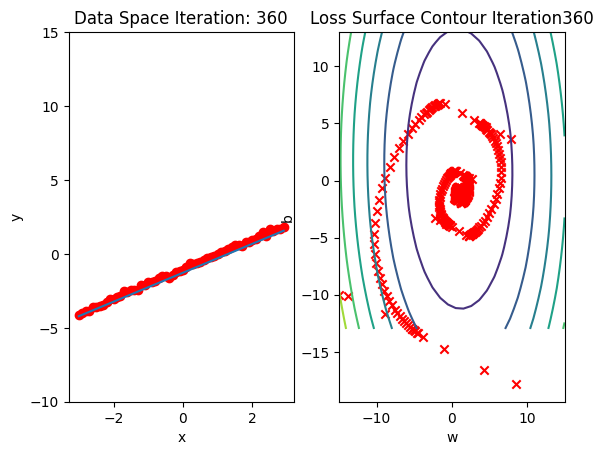

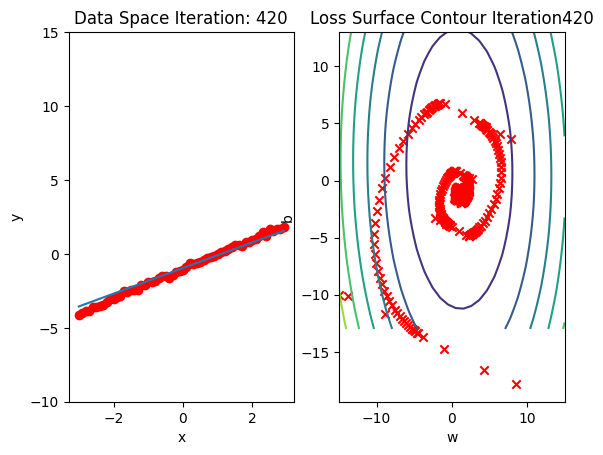

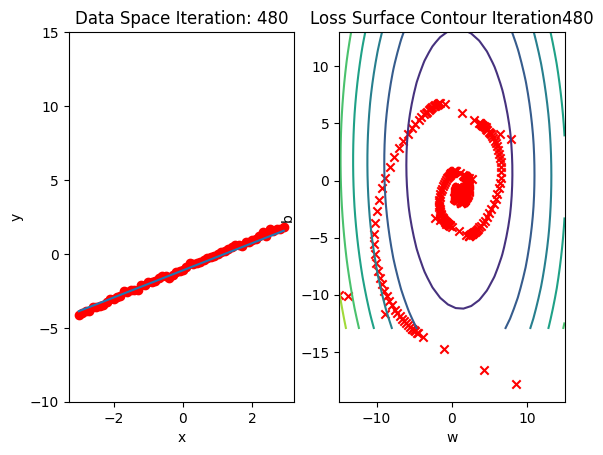

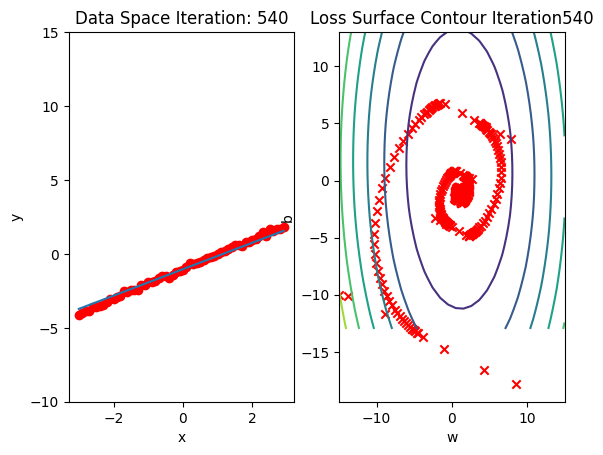

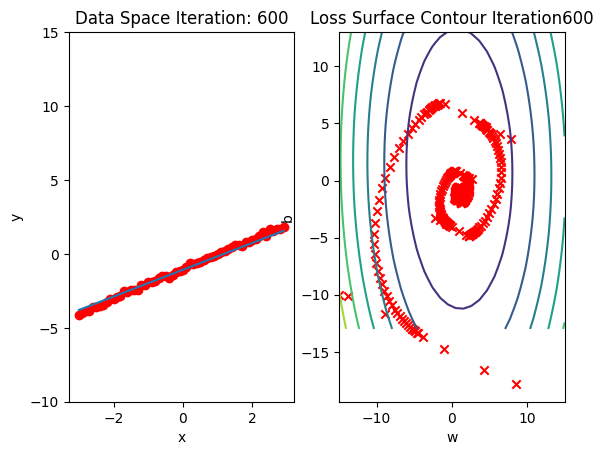

In [156]:
# Practice: Train the model via BGD using optimizer
model = linear_regression(1,1)
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)
optimizer = optim.SGD(model.parameters(), lr=0.1)

def train_model_BGD_1(iter):
  for epoch in range(iter):
    for x, y in trainloader:
      yhat = model(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(model, loss.tolist())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    get_surface.plot_ps()

train_model_BGD_1(10)

## Linear regression: Training and Validation Data

In [157]:
# Import libraries we need for this lab, and set the random seed
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim

In [158]:
# Create Data class
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):

  # Constructor
  def __init__(self, train=True):
    self.x = torch.arange(-3, 3, 0.1).view(-1,1)
    self.f = -3 * self.x + 1
    self.y = self.f + 0.1 * torch.randn(self.x.size())
    self.len = self.x.shape[0]

    # outliers
    if train == True:
      self.y[0] = 0
      self.y[50:55] = 20
    else:
      pass

  # Getter
  def __getitem__(self, index):
    return self.x[index], self.y[index]

  # Get Length
  def __len__(self):
    return self.len

In [161]:
# Create training dataset and validation dataset
train_data = Data()
val_data = Data(train=False) # training data has the outliers

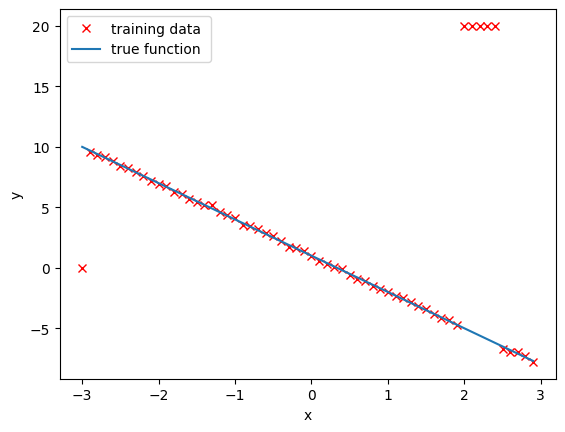

In [163]:
# Plot out training points
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(), label="true function ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

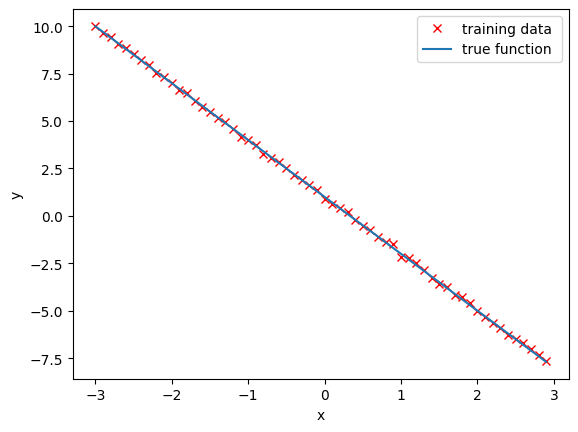

In [164]:
# Plot out validatioon points
plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'xr', label="training data ")
plt.plot(val_data.x.numpy(), val_data.f.numpy(), label="true function ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [253]:
# Create Linear Regression Class
from torch import nn

class linear_regression(nn.Module):

  # Constructor
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  # Prediction function
  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [254]:
# Create MSELoss function and DataLoader
criterioon = nn.MSELoss()
trainloader = DataLoader(dataset=train_data, batch_size=1)

In [255]:
# Create Learning Rate list, the error lists and the MODELS list
learning_rate = [0.0001, 0.001, 0.01, 0.1]
train_error = torch.zeros(len(learning_rate))
val_error = torch.zeros(len(learning_rate))
MODELS = []

In [258]:
# Define the train model function and train the model

def train_model_with_lr(iter, lr_list):

  # iterate through different learning rates
  for i, lr in enumerate(lr_list):
    model = linear_regression(1, 1)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(iter):
      for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      # train data
      Yhat = model(train_data.x)
      train_loss = criterion(Yhat, train_data.y)
      train_error[i] = train_loss.item()

      # validation data
      Yhat = model(val_data.x)
      val_loss = criterion(Yhat, val_data.y)
      val_error[i] = val_loss.item()
      MODELS.append(model)
    print("Learning Rate: ", lr)

train_model_with_lr(10, learning_rate)


Learning Rate:  0.0001
Learning Rate:  0.001
Learning Rate:  0.01
Learning Rate:  0.1


In [262]:
print(val_error)

tensor([26.9283, 11.4499, 10.3724,  5.8894])


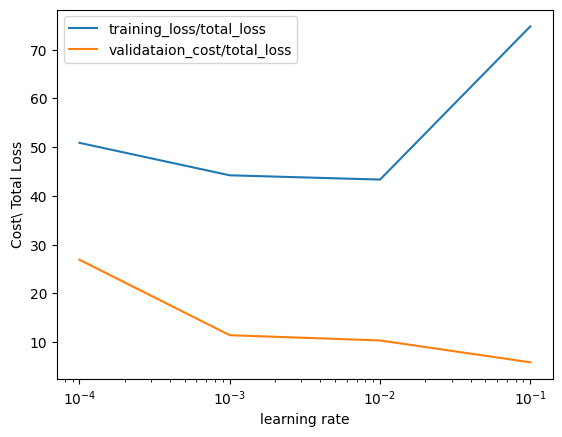

In [263]:
# Plot the training loss and validation loss
plt.semilogx(np.array(learning_rate), train_error.numpy(), label='training_loss/total_loss')
plt.semilogx(np.array(learning_rate), val_error.numpy(), label='validataion_cost/total_loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

0 [[1.4377005]
 [1.4256672]
 [1.4136338]]
1 [[5.42082  ]
 [5.306529 ]
 [5.1922383]]
2 [[6.587844 ]
 [6.453656 ]
 [6.3194685]]
3 [[14.518285]
 [14.081502]
 [13.644718]]


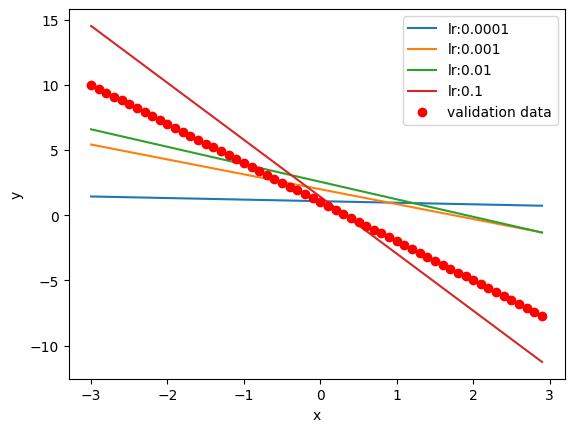

In [264]:
i = 0
yhat_l = []
for model, learning_rate in zip(MODELS, learning_rate):
    yhat = model(val_data.x)
    yhat_l.append(yhat)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print(i, yhat.detach().numpy()[0:3])
    i+=1
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [267]:
good_model = MODELS[np.argmin(val_error)]

for x, y in trainloader:
    print("yhat= ", good_model(x),"y", y)

yhat=  tensor([[14.5183]], grad_fn=<AddmmBackward0>) y tensor([[0.]])
yhat=  tensor([[14.0815]], grad_fn=<AddmmBackward0>) y tensor([[9.5934]])
yhat=  tensor([[13.6447]], grad_fn=<AddmmBackward0>) y tensor([[9.3614]])
yhat=  tensor([[13.2079]], grad_fn=<AddmmBackward0>) y tensor([[9.1378]])
yhat=  tensor([[12.7712]], grad_fn=<AddmmBackward0>) y tensor([[8.7930]])
yhat=  tensor([[12.3344]], grad_fn=<AddmmBackward0>) y tensor([[8.3955]])
yhat=  tensor([[11.8976]], grad_fn=<AddmmBackward0>) y tensor([[8.2613]])
yhat=  tensor([[11.4608]], grad_fn=<AddmmBackward0>) y tensor([[7.9463]])
yhat=  tensor([[11.0240]], grad_fn=<AddmmBackward0>) y tensor([[7.5920]])
yhat=  tensor([[10.5872]], grad_fn=<AddmmBackward0>) y tensor([[7.1651]])
yhat=  tensor([[10.1505]], grad_fn=<AddmmBackward0>) y tensor([[6.9174]])
yhat=  tensor([[9.7137]], grad_fn=<AddmmBackward0>) y tensor([[6.7265]])
yhat=  tensor([[9.2769]], grad_fn=<AddmmBackward0>) y tensor([[6.2684]])
yhat=  tensor([[8.8401]], grad_fn=<AddmmBack